# <a id='toc1_'></a>Исследование рынка видеоигр [](#toc0_)

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Согласно документации к проекту, датасет представляет собой данные c 1980 по 2016 год. 

## <a id='toc1_1_'></a>Часть 1. Изучение и подготовках данных [](#toc0_)

**Содержание**<a id='toc0_'></a>    
- [Исследование рынка видеоигр](#toc1_)    
  - [Часть 1. Изучение и подготовках данных](#toc1_1_)    
      - [Импорт библиотек](#toc1_1_1_1_)    
      - [Содержание данных](#toc1_1_1_2_)    
      - [Описание данных](#toc1_1_1_3_)    
      - [Графики распределения данных и их описание](#toc1_1_1_4_)    
  - [Часть 2. Переработка данных](#toc1_2_)    
      - [Общая обработка данных.](#toc1_2_1_1_)    
      - [Обработка пропусков](#toc1_2_1_2_)    
      - [Поиск дубликатов](#toc1_2_1_3_)    
      - [Обработка аномальных значений](#toc1_2_1_4_)    
      - [Результат переработки данных](#toc1_2_1_5_)    
      - [Добавление данных](#toc1_2_1_6_)    
  - [Часть 3. Исследовательский анализ данных](#toc1_3_)    
      - [Продажи по платформам](#toc1_3_1_1_)    
      - [Оценка актуальных платформ](#toc1_3_1_2_)    
      - [Связь между продажами продукта и его оценками](#toc1_3_1_3_)    
      - [Жанры игр](#toc1_3_1_4_)    
  - [Шаг 4. Портрет пользователя по регионам](#toc1_4_)    
      - [Платформы](#toc1_4_1_1_)    
      - [жанры](#toc1_4_1_2_)    
      - [ESRB](#toc1_4_1_3_)    
  - [Шаг 5. Проверка гипотез](#toc1_5_)    
  - [Вывод](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#### <a id='toc1_1_1_1_'></a>Импорт библиотек [](#toc0_)

In [1]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': [12, 12]})
plt.rcParams['lines.linewidth'] = 2

#### <a id='toc1_1_1_2_'></a>Содержание данных [](#toc0_)

In [3]:
try:
    data = pd.read_csv('/Volumes/GoogleDrive/My Drive/YP/games.csv',sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv',sep=',')

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### <a id='toc1_1_1_3_'></a>Описание данных [](#toc0_)

In [5]:
dirty_shape = data.shape[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### <a id='toc1_1_1_4_'></a>Графики распределения данных и их описание [](#toc0_)

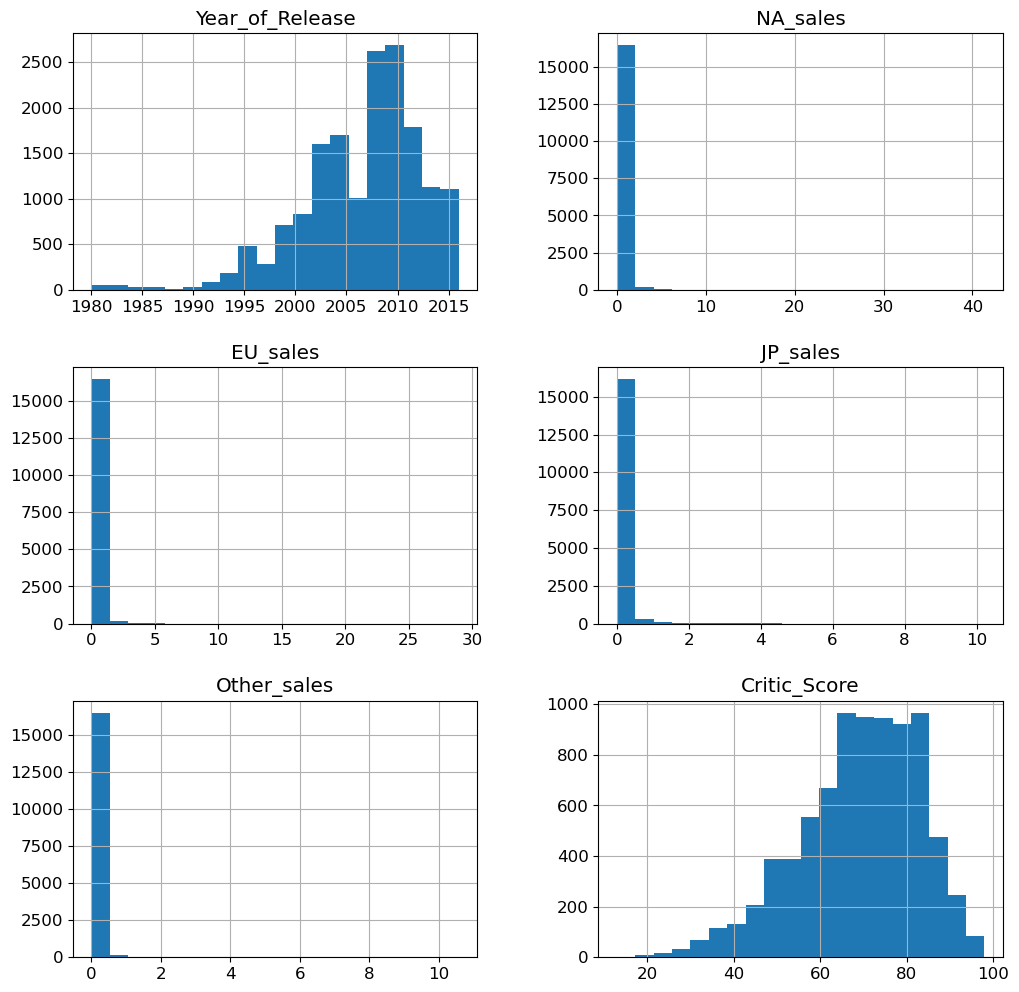

In [6]:
data_hist_dirty = data.hist(figsize=(12,12), bins=20)

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


*Первые выводы*:

* Данные содержат 11 колонок и 16715 строки;
* Из таблицы data.info() можно видеть, что в данных есть пропуски. К тому же имеются колонки с некорректным типом данных:
  - `Year_of_Release` - стоит поменять на тип данных datatime. Однако, так как дата представлена только годом, достаточно будет привести столбец к типу `int`;
  - `User_Score` - следует изменить тип данных на `float`, по аналогии с `Critic_Score`;
  - Пропуски наблюдаются в столбцах: `Year_of_Release`, `Name`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
* Графики гистограмм и data.describe() показывают, что в данных есть аномальные значения. Так, можно наблюдать:
  - Аномалии в значениях продаж в каждом регионе.
  
Переработаем каждую колонку с данными на предмет аномалий и пропусков.

## <a id='toc1_2_'></a>Часть 2. Переработка данных [](#toc0_)

#### <a id='toc1_2_1_1_'></a>Общая обработка данных. [](#toc0_)

Приведём колонки к нижнему регистру:

In [8]:
data.columns = data.columns.str.lower()

#### <a id='toc1_2_1_2_'></a>Обработка пропусков [](#toc0_)

Оценим количество пропущенных данных

In [9]:
spaced_data = (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending=True)
)
spaced_data.sort_values(by='space', ascending=False).style.format("{:,.2f}%")

,space
critic_score,51.32%
rating,40.48%
user_score,40.09%
year_of_release,1.61%
name,0.01%
genre,0.01%


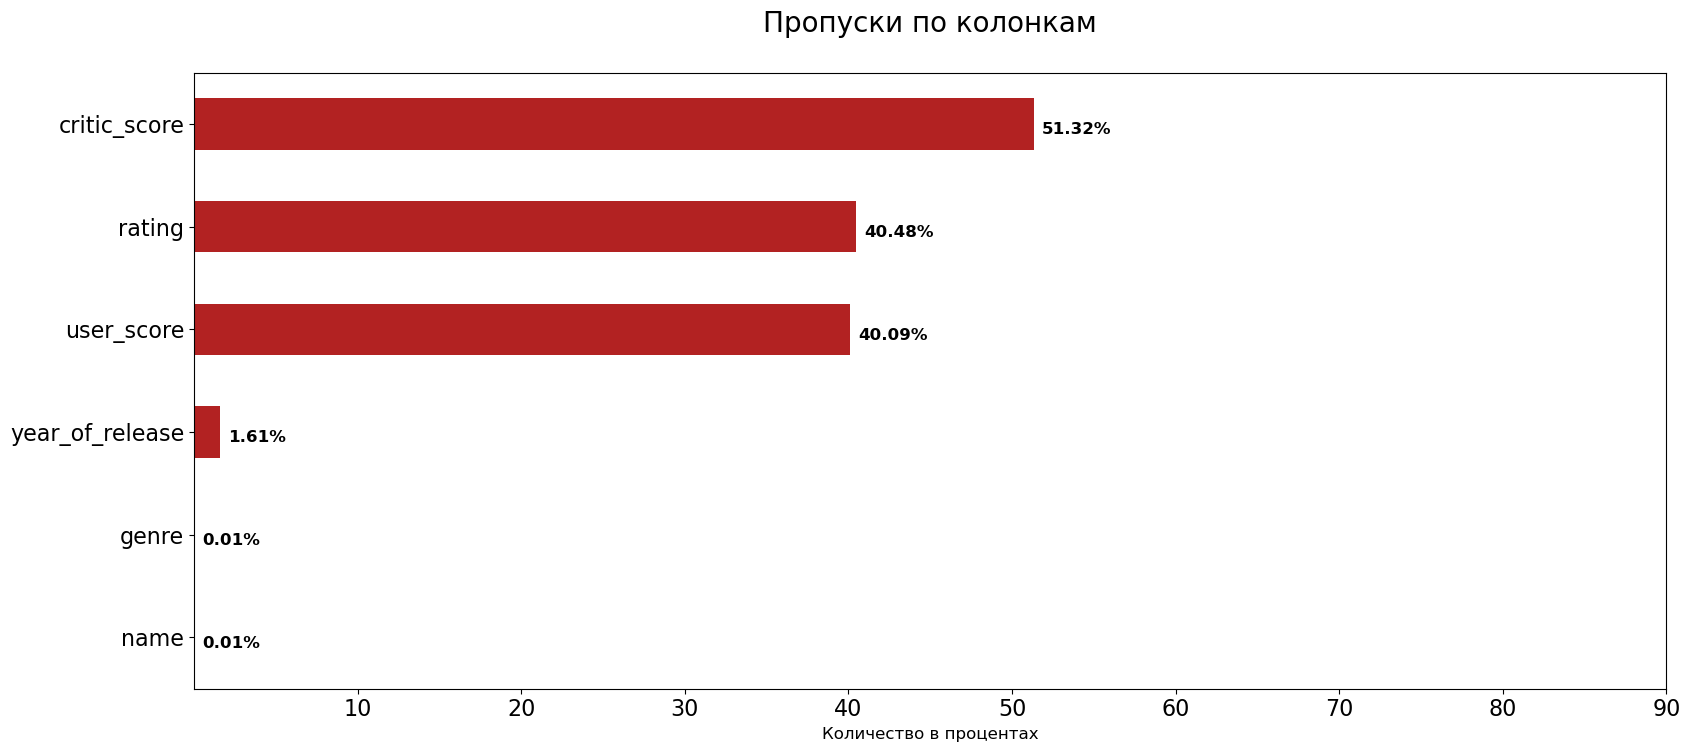

In [10]:
ax = (
    spaced_data.plot
    .barh(y='space', figsize = (19,8), rot = 0, legend = False, fontsize = 16, color='firebrick'))
ax.xaxis.set_ticks([10,20,30,40,50,60,70,80,90])
ax.set_title('Пропуски по колонкам' + '\n', fontsize = 20, color='black')
ax.set_xlabel('Количество в процентах')
for i, v in enumerate(spaced_data.space):
    ax.text(v + 0.5, i - .1, '{:,.2f}%'.format((v)), color='black', fontweight='bold')

In [11]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Количество пропусков в данных `genre`, `name` и `year_of_release` невелико. При этом пропуски в имени и жанре наблюдаются в одних и тех же строках. так как количество пропусков невелико, а оставшиеся информация сама по себе не несёт никакого интереса - удаляем данные строки:

In [12]:
data = data.query('name.notna() & year_of_release.notna()')
data['year_of_release'] = data['year_of_release'].astype(int)

#### <a id='toc1_2_1_3_'></a>Поиск дубликатов [](#toc0_)

Проверим дубликаты в названиях платформ, названиях игр, жанре, а так же присваиваемом рейтинге. 

In [13]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов в названии платформ не выявлено.

In [14]:
data['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64

In [15]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубликаты в названии связаны со следующими факторами:
- Игра выходила на разных платформах;
- Перезапуск игры. Пример: `Need for Speed: Most Wanted` 2005 года и 2012 года. 

Для дальнейшего анализа стоит обратить внимание на рейтинг, оценки и продажи в этом срезе данных. Не смотря на то, что игра имеет одинаковое название, продажи и оценки на разных платформах разняться. Из этого можно сделать вывод, что возникшие пропуски нельзя заполнять по медиане или среднему из какой либо группы, так как это исказит реальные данные. 

In [16]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликатов в названии жанров нет.

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

[Entertainment Software Rating Board](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) - организация, которая отвечает за принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения. Имеет следующие рейтинги:

- «EC» («Early childhood») — «Для детей младшего возраста;
- «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults"):;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»;
- «M» («Mature») — «Для взрослых»;
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «RP» («Rating Pending») — «Рейтинг ожидается».

 При этом имеются пропуски, а так же рейтинг `K-A`, который в последствии стал обозначаться - `E`. 

 Исправим найденные проблемы. Заменим `K-A` на `E`, а пропуски на `undef` (неопределенно) с целью приведения данных к одному типу. 

In [18]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].fillna('undef')

In [19]:
# Проверим корректность замены
data['rating'].unique()

array(['E', 'undef', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Заменим `to be determined (tbd)` на пропуски, чтобы получить везде один формат данных - `float`:

In [21]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)

#### <a id='toc1_2_1_4_'></a>Обработка аномальных значений [](#toc0_)

In [22]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


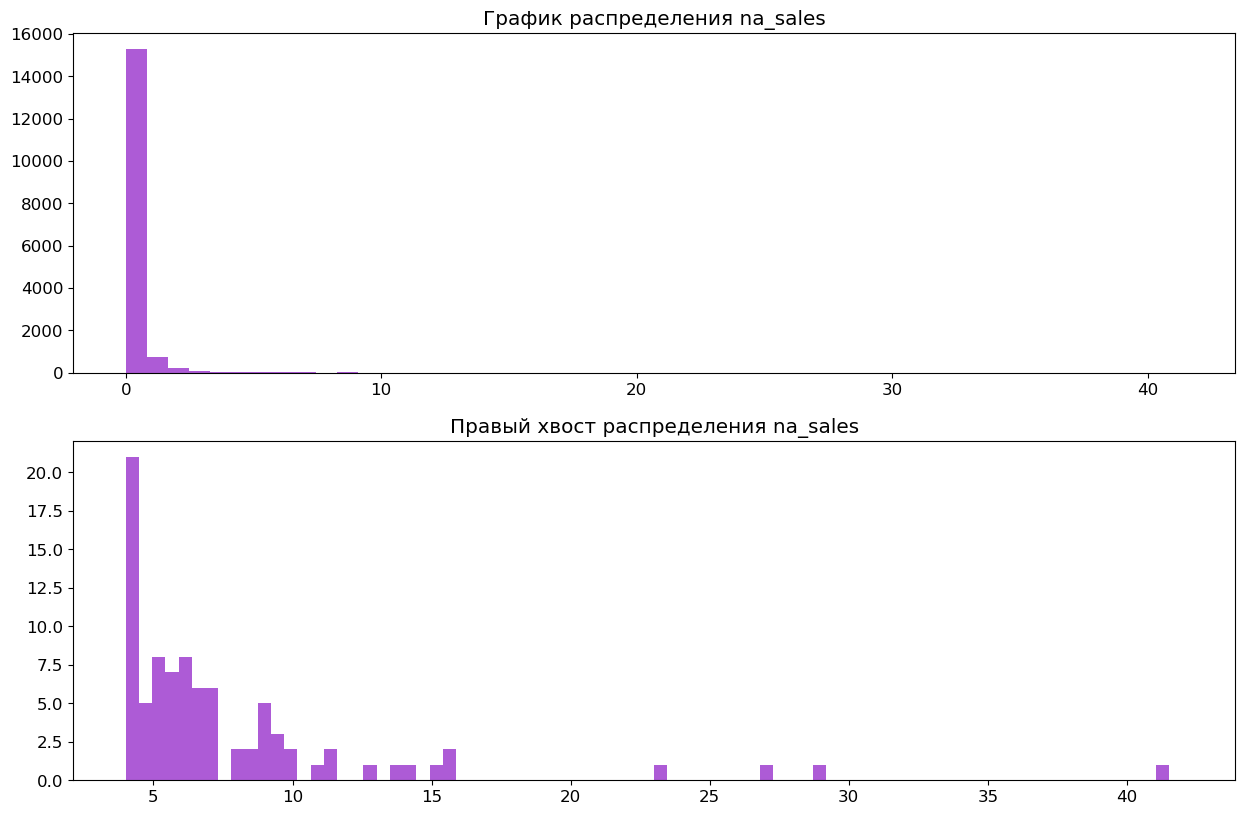

In [23]:
fig = plt.figure(figsize=(15,15))

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 1, 2)

ax_1.hist(x=data.na_sales, bins=50, color='darkorchid', alpha=0.8)
ax_2.hist(x=data.na_sales, range=(4,42), bins=80, color='darkorchid', alpha=0.8)

ax_1.set(title='График распределения na_sales')
t = ax_2.set(title='Правый хвост распределения na_sales')

Наблюдается мало значений больше 15 миллионов проданных копий для данных `na_sales`.

In [24]:
data.query('na_sales>15')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undef
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undef
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undef


Удалим редкие значения:

In [25]:
data = data.query('na_sales<=15')

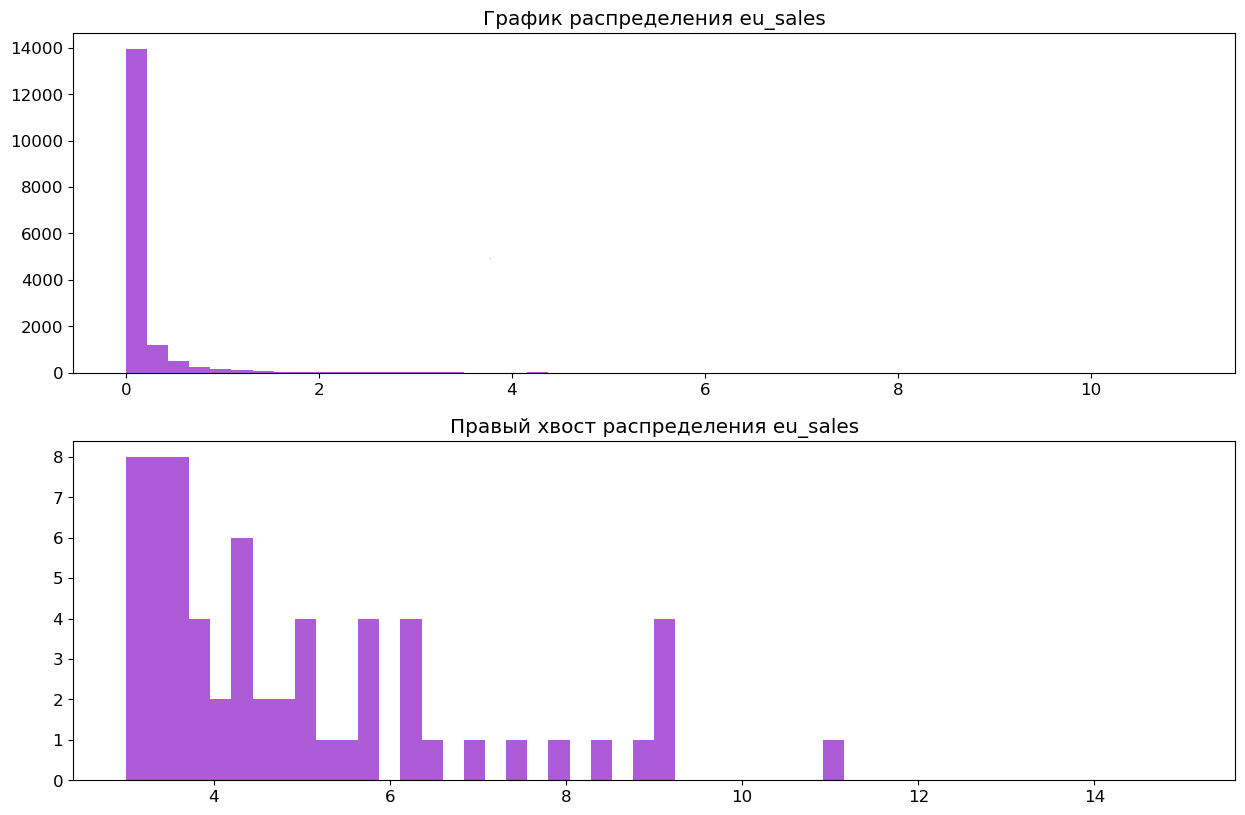

In [26]:
fig = plt.figure(figsize=(15,15))

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 1, 2)

ax_1.hist(x=data.eu_sales, bins=50, color='darkorchid', alpha=0.8)
ax_2.hist(x=data.eu_sales, range=(3,15), bins=50, color='darkorchid', alpha=0.8)

ax_1.set(title='График распределения eu_sales')
t = ax_2.set(title='Правый хвост распределения eu_sales')

In [27]:
data.query('eu_sales>10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,undef


Имеется всего одно значение в данных `eu_sales` > 10. Оставим его, так как значение лежит не далеко от других значений

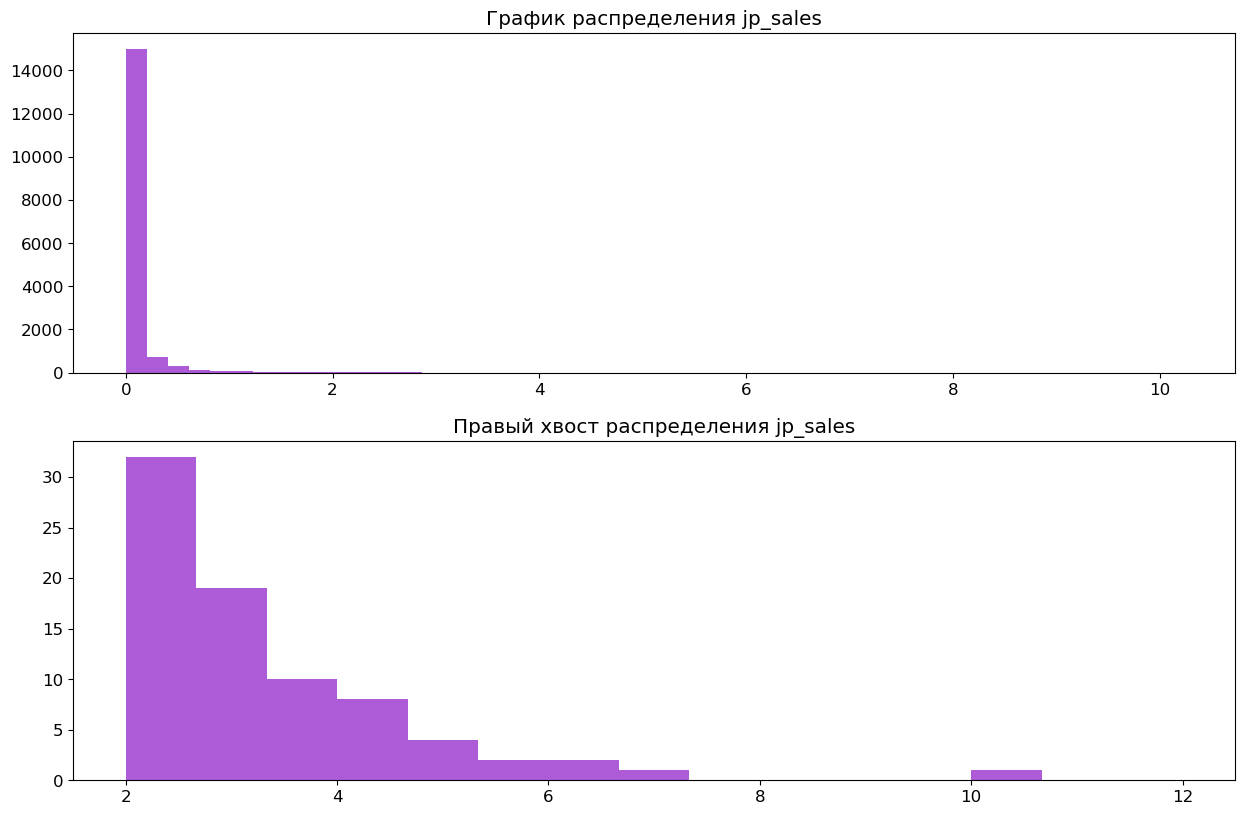

In [28]:
fig = plt.figure(figsize=(15,15))

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 1, 2)

ax_1.hist(x=data.jp_sales, bins=50, color='darkorchid', alpha=0.8)
ax_2.hist(x=data.jp_sales, range=(2,12), bins=15,  color='darkorchid', alpha=0.8)

ax_1.set(title='График распределения jp_sales')
t = ax_2.set(title='Правый хвост распределения jp_sales')

In [29]:
data.query('jp_sales>6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undef
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,undef
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,undef


В данных о продажах в японии также присутствуют выбросы. Однако отклонения являются незначительными, и как следствие их можно оставить. 

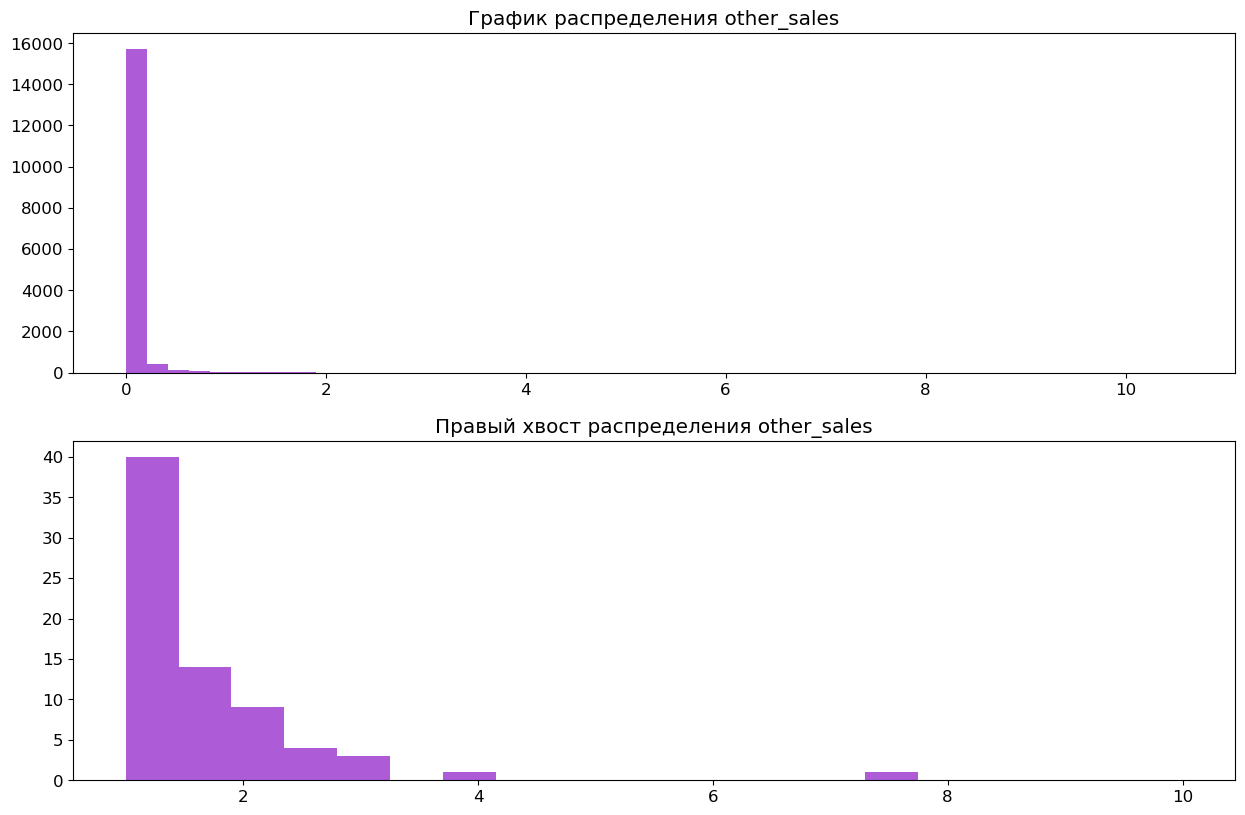

In [30]:
fig = plt.figure(figsize=(15,15))

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 1, 2)

ax_1.hist(x=data.other_sales, bins=50,color='darkorchid', alpha=0.8)
ax_2.hist(x=data.other_sales, range=(1,10), bins=20, color='darkorchid', alpha=0.8)

ax_1.set(title='График распределения other_sales')
t = ax_2.set(title='Правый хвост распределения other_sales')

In [31]:
data.query('other_sales>4')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E


Обнаруженные экстремальные значения стоит удалить:

In [32]:
data = data.query('other_sales<4')

Сбросим индекс:

In [33]:
data.reset_index(inplace=True,drop=True)

#### <a id='toc1_2_1_5_'></a>Результат переработки данных [](#toc0_)

In [34]:
print('Количество строк в неочищенном дата фрейме: {}. Количество в отчищенном дата фрейме: {}. Сохранность информации составила: {:,.02%}'\
    .format(dirty_shape,data.shape[0],data.shape[0] / dirty_shape))

Количество строк в неочищенном дата фрейме: 16715. Количество в отчищенном дата фрейме: 16436. Сохранность информации составила: 98.33%


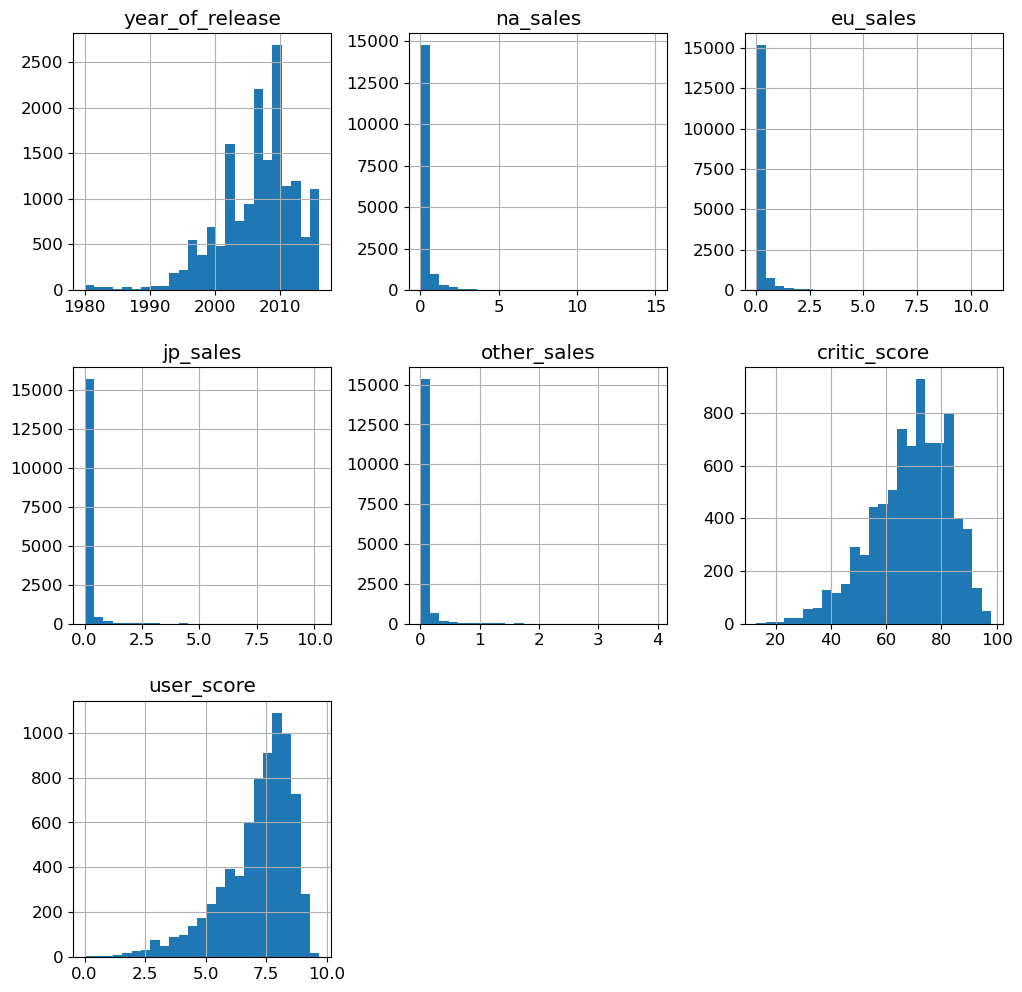

In [35]:
ax = data.hist(bins=25)

In [36]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16436.000000,16436.000000,16436.00000,16436.000000,16436.000000,7978.000000,7458.000000
mean,2006.490083,0.254145,0.14238,0.077086,0.045511,68.984708,7.125503
std,5.870250,0.638006,0.43427,0.301105,0.140384,13.918044,1.499578
min,1980.000000,0.000000,0.00000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.00000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.02000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.11000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,15.000000,10.95000,10.220000,3.960000,98.000000,9.700000


В результате переработки данных были выполнены следующие действия:

- Все названия колонок были приведены к стилю `shake_case`;
- С пропусками была проведена следующая работа:
    * Обнаружены пропуски;
    * Определена ценность оставшейся информации;
    * Пропуски были удалены.
- Были обработаны явные и неявные дубликаты. В колонке `rating` пропуски были заменены на `undef` с целью привести все значения к одному типу. В свою очередь в столбце `user_score` `to be determined` наоборот были заменены на пустые значения, с той же целью;
- Были обработаны хвосты в `na_sales`, `eu_sales`, `jp_sales`, `other_sales`;
- Индекс приведён в соответствующий формат.

Пропуски содержатся в колонках: `user_score`, `rating`, `critic_score`. Причин может быть несколько:
- Технические: проблемы при парсинге данных из открытых источников;
- Объективные: различные агенства не предоставили рейтинги или оценки (например, из-за их малого количества). В связи с чем данных просто нет или не было на момент их сбора.

#### <a id='toc1_2_1_6_'></a>Добавление данных [](#toc0_)

In [37]:
# Было
#data['summary_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# Стало
data['summary_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## <a id='toc1_3_'></a>Часть 3. Исследовательский анализ данных [](#toc0_)

Посмотрим, сколько данных имеют `critic_score` и `user_score`, и как они распределены по годам. 

In [38]:
spaced_data_score = (
    data.groupby('year_of_release').agg(all_data=('name','count'))
    .join(data.query('critic_score.notna()').groupby('year_of_release').agg(critic_score_fill=('name','count')))
    .join(data.query('user_score.notna()').groupby('year_of_release').agg(user_score_fill=('name','count')))
)

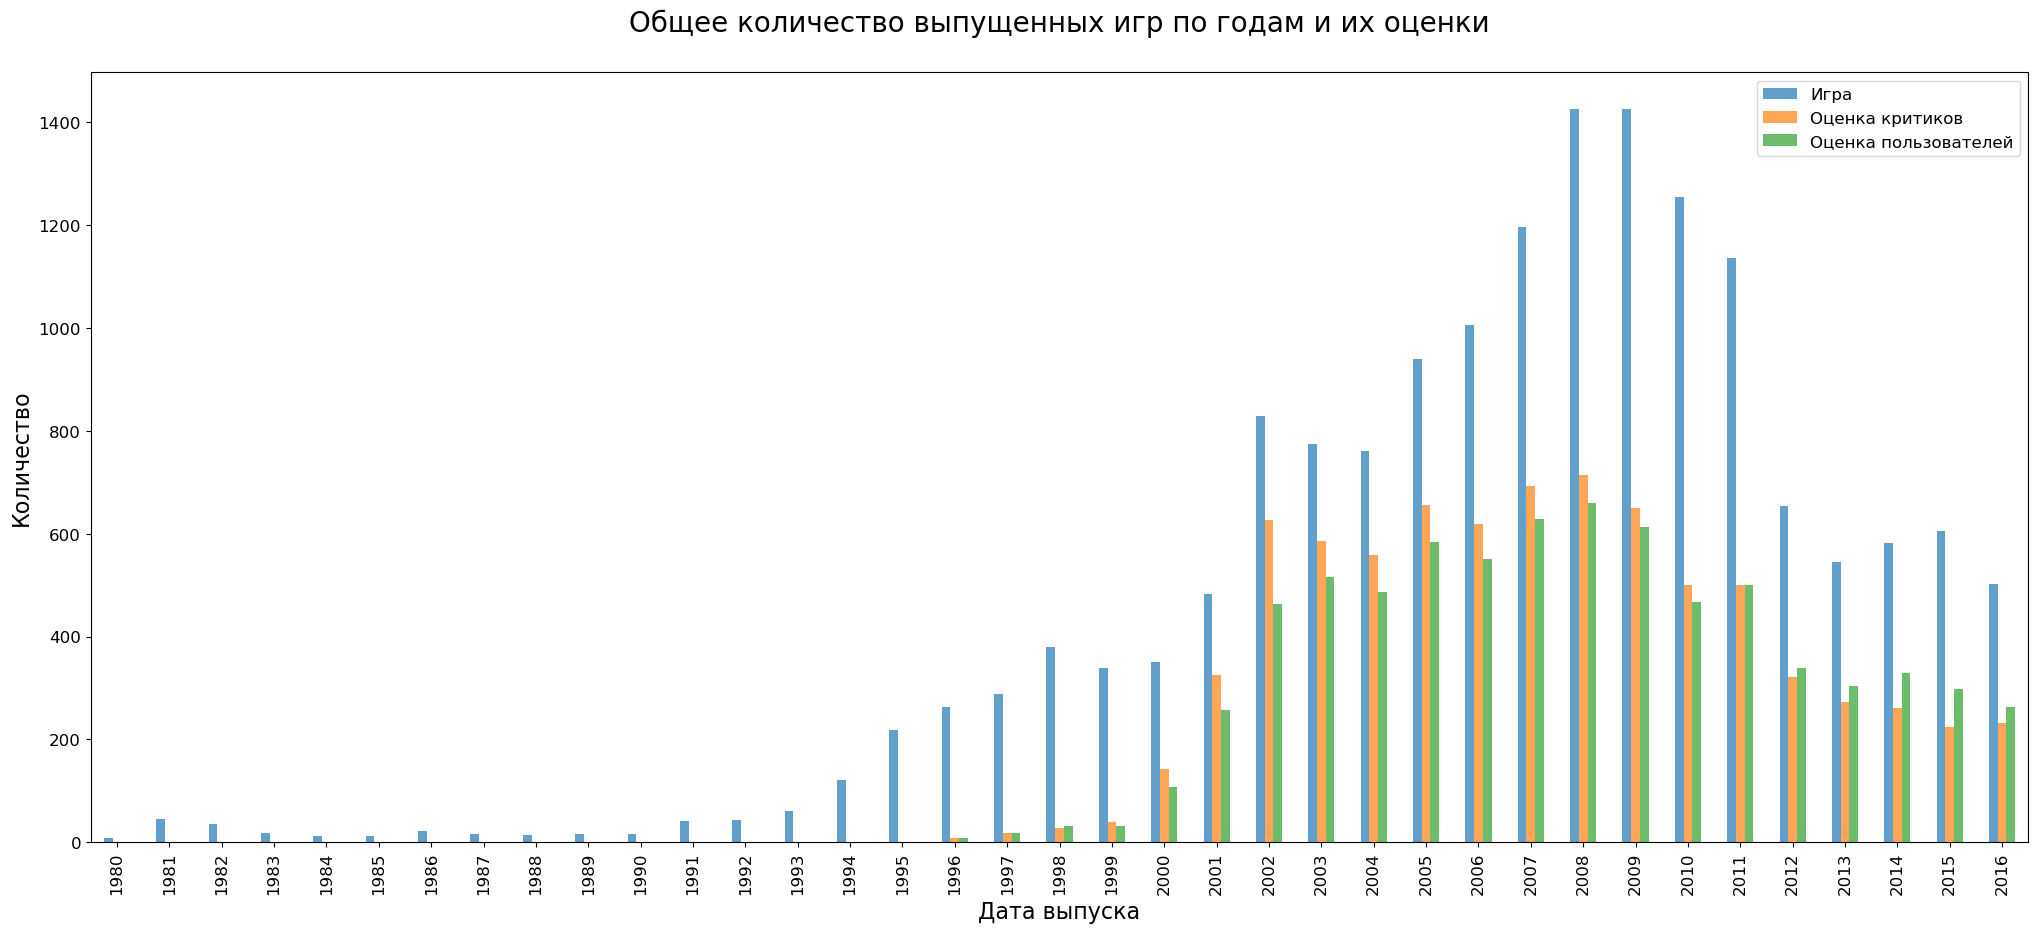

In [39]:
ax = spaced_data_score.plot(kind='bar', figsize=(25,10), alpha=0.7)
plt.ylabel('Количество', fontsize=16)
plt.xlabel('Дата выпуска',fontsize=16)
plt.legend(['Игра','Оценка критиков','Оценка пользователей'])
t= plt.title('Общее количество выпущенных игр по годам и их оценки\n', fontsize=20)

Из графика видно, что первая часть датасета сильно меньше, чем вторая его половина. Это связано с объективным фактором - развитием технологий и доступностью видеоигр для массового рынка, начиная с ~ 1991 года. Для целей исследования возьмём данные с 1994 года, ведь именно с этого года начался взрывной рост выпускаемого количества игр. Для оценки `critic_score` и `user_score` стоит взять данные с 2001 года, ведь именно с этого года средний процент поставленных оценок достигает ~50%.

In [40]:
data_actual_1994 = data.query('year_of_release > 1993')

In [41]:
table_of_releases_by_platform = (
    data_actual_1994
    .pivot_table(index='platform', 
                 values='name', 
                 columns = 'year_of_release', 
                 aggfunc = 'count', 
                 fill_value=0, 
                 margins=True))[:-1]

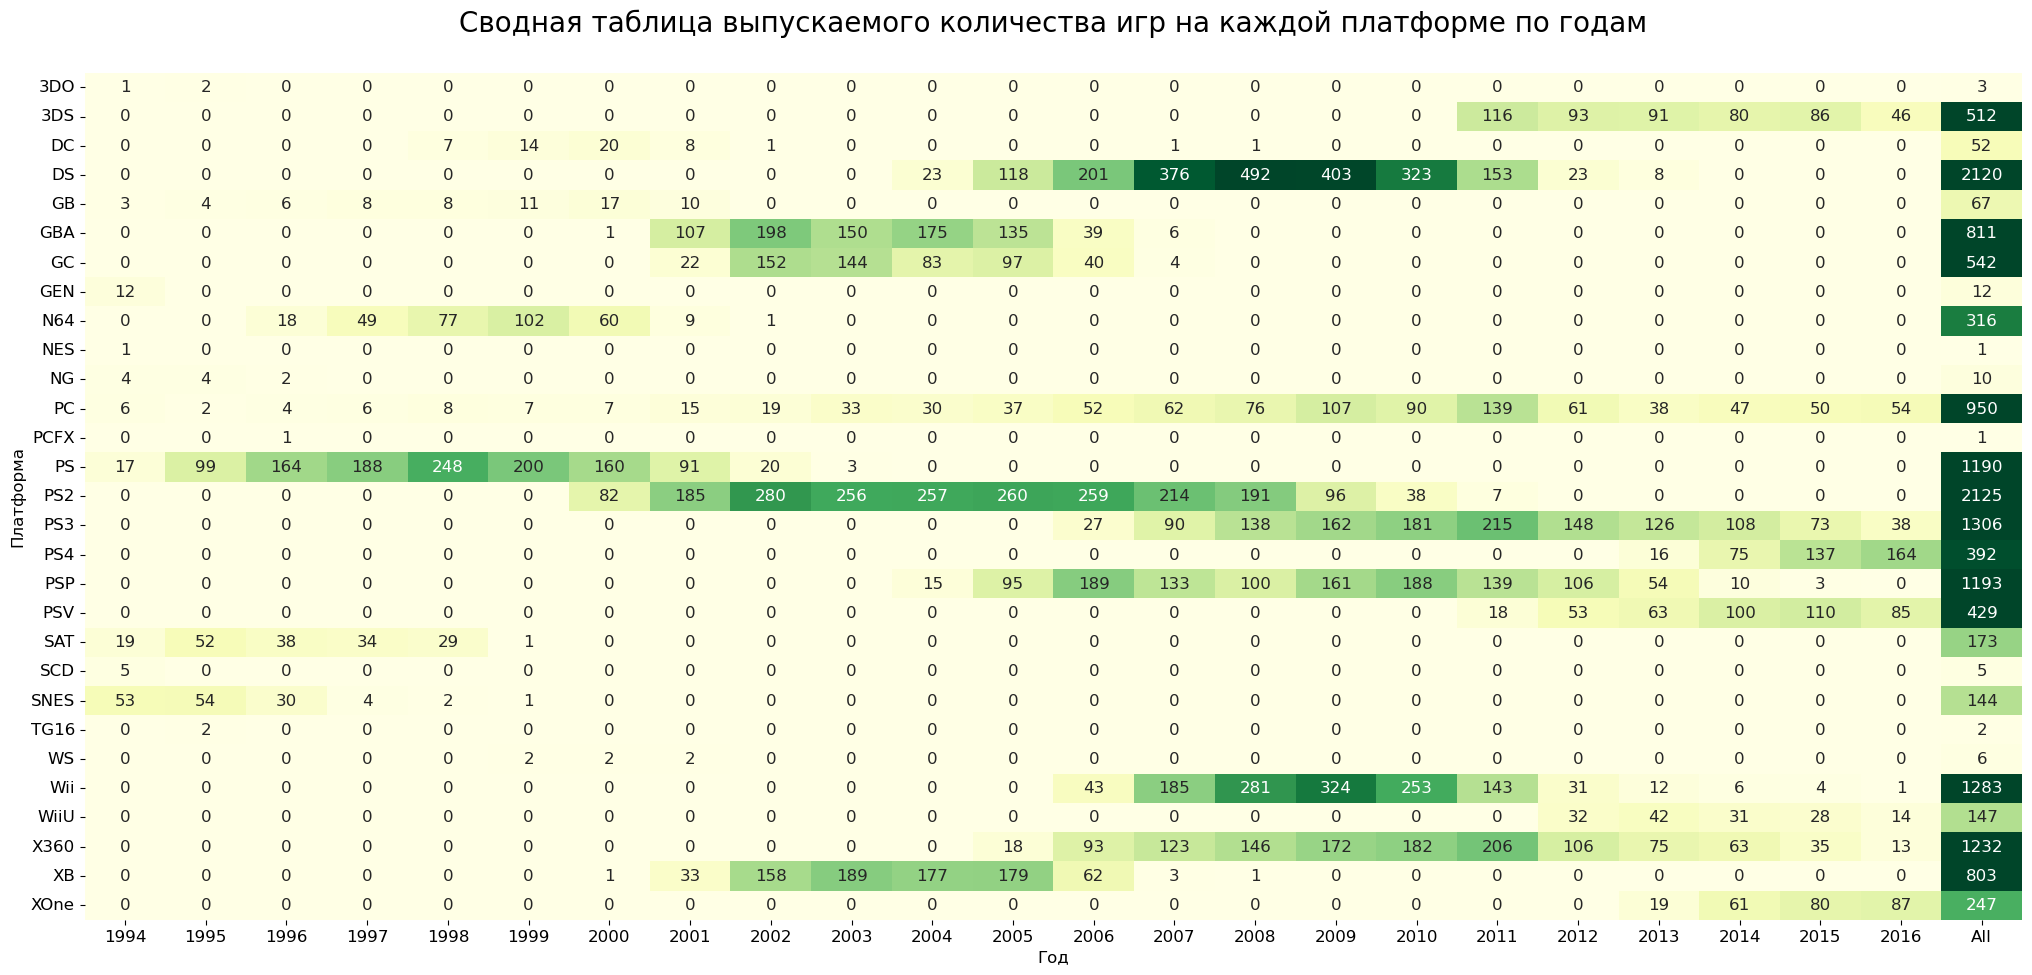

In [42]:
plt.figure(figsize=(25, 11))
sns.heatmap(table_of_releases_by_platform, annot=True, fmt="d", cmap='YlGn', cbar=False, robust=True)
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.title('Сводная таблица выпускаемого количества игр на каждой платформе по годам\n', fontsize=20)
plt.show()

#### <a id='toc1_3_1_1_'></a>Продажи по платформам [](#toc0_)

In [43]:
platform_sales_by_years = (
    data_actual_1994
    .pivot_table(index='platform', 
                 values='summary_sales', 
                 columns = 'year_of_release', 
                 aggfunc = 'sum', 
                 fill_value=0, 
                 margins=True))[:-1]

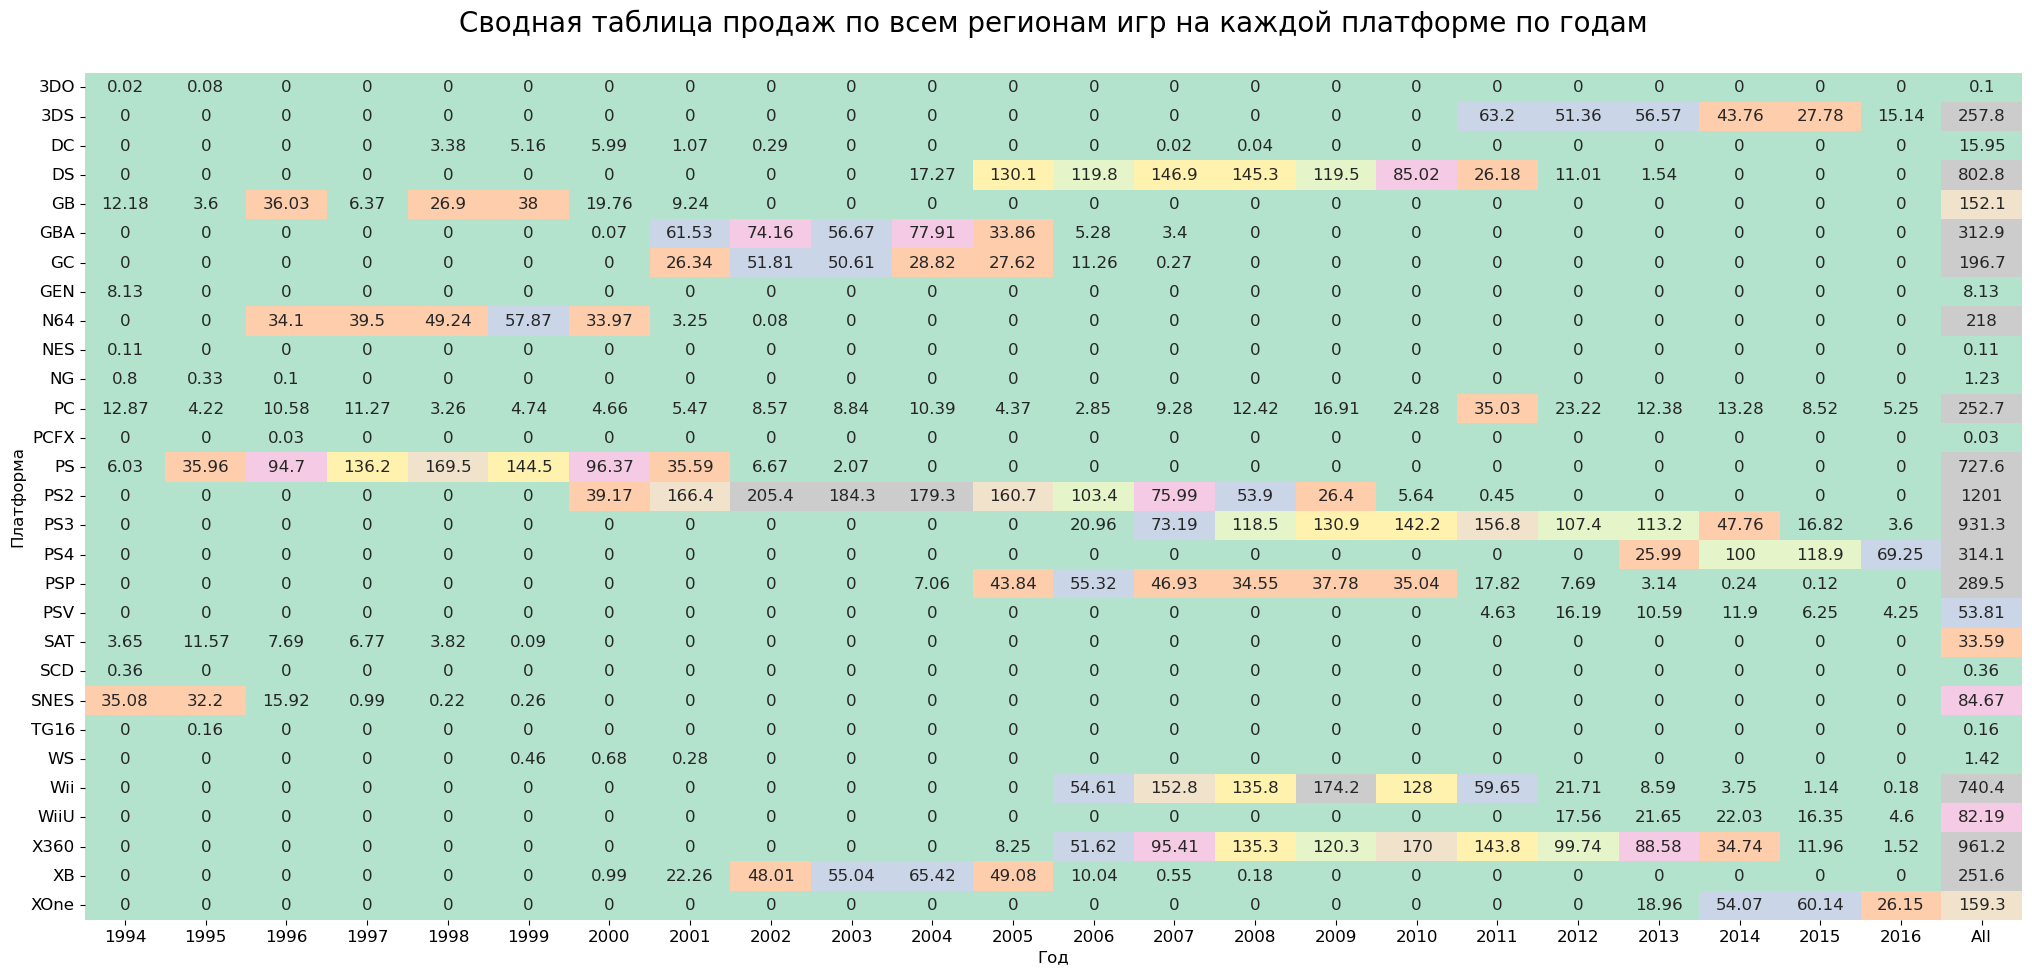

In [44]:
plt.figure(figsize=(25, 11))
sns.heatmap(platform_sales_by_years, annot=True,fmt='.4g', cmap='Pastel2', cbar=False, robust=True)
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.title('Сводная таблица продаж по всем регионам игр на каждой платформе по годам\n', fontsize=20)
plt.show()

Построим наглядную круговую диаграмму

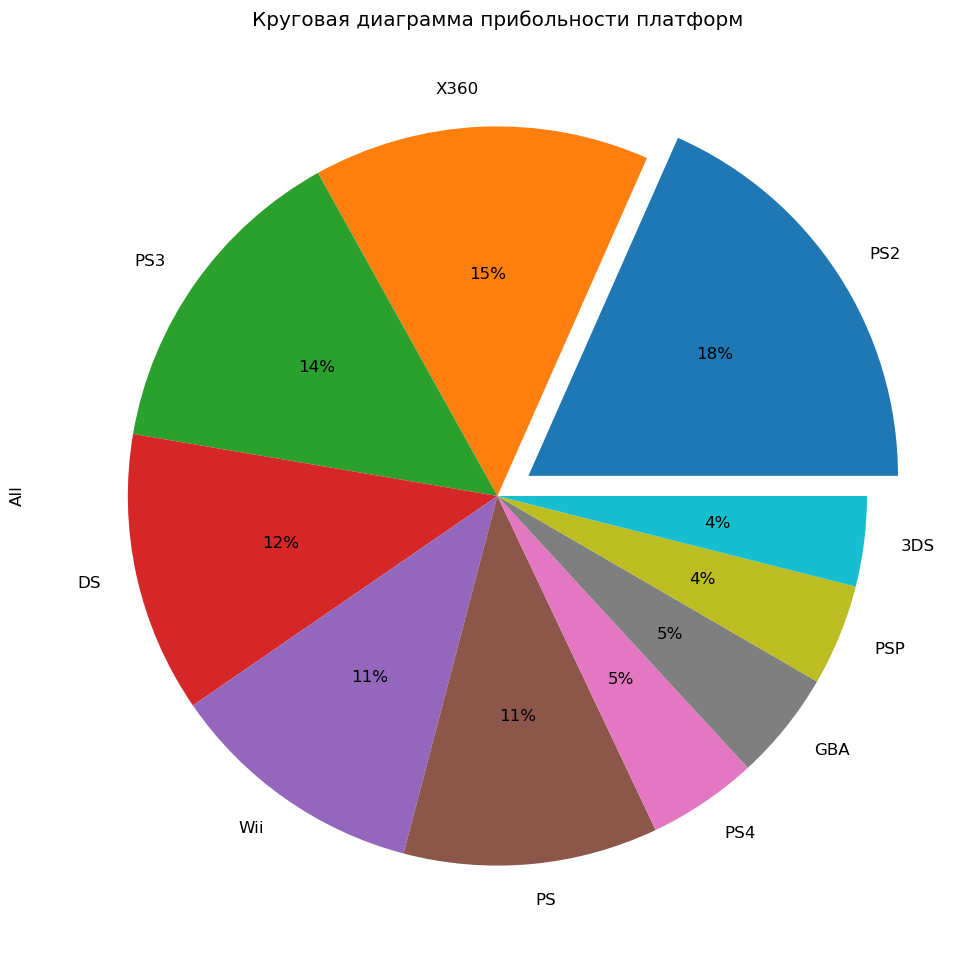

In [45]:
(
    platform_sales_by_years
    .sort_values(by='All',ascending=False).iloc[:,-1]
    .head(10)
    .plot(kind='pie', subplots=True, figsize=(15,12), autopct='%1.0f%%', explode=[0.1,0,0,0,0,0,0,0,0,0])
)
plt.title('Круговая диаграмма прибольности платформ')
plt.show()

Наибольшее количество продаж наблюдается у PS2 - `18%`. Далее 2 мест с небольшим отставанием занимают `X360` - `15%` и `PS3` - `14%`. Пятерку, а на деле шестерку лидеров замыкают `DS` с `12%` и `Wii`/`PS` с одинаковыми долями - `11%`. 

Посмотрим на среднюю продолжительность жизни платформы. Посмотрим график топ-6 платформ:

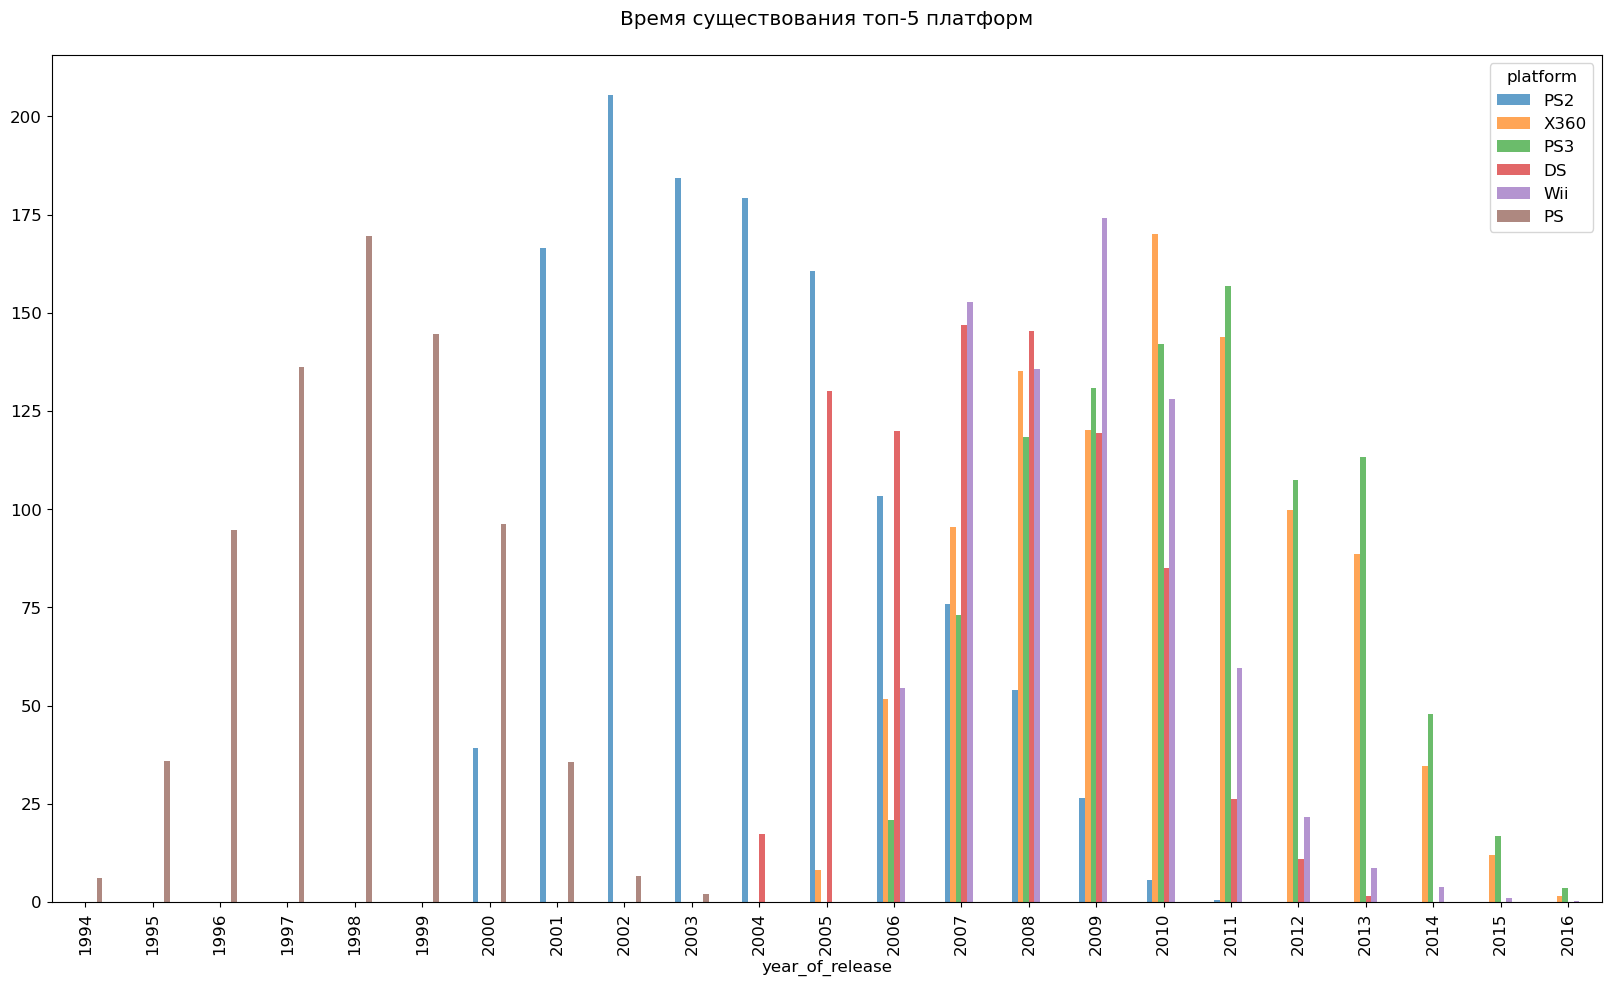

In [46]:
top_five_platforms = (platform_sales_by_years
                      .sort_values(by='All',ascending=False).iloc[:,:-1]
                      .head(6)
                      .transpose())
top_five_platforms.plot(kind='bar', figsize=(20,11), alpha=0.7)
plt.title('Время существования топ-5 платформ\n')
plt.show()

In [47]:
(
    top_five_platforms
    .replace(0, np.nan)
    .count()
    .describe()[['50%','mean']]
)

50%     11.0
mean    11.0
dtype: float64

Среднее совпадает с медианным значение и составляет 11 лет. Столько обычно существуют консоли. Посмотрим данную статистику по всем платформам: 

In [48]:
platforms_life_time = (
    platform_sales_by_years
    .sort_values(by='All',ascending=False).iloc[:,:-1]
    .transpose())

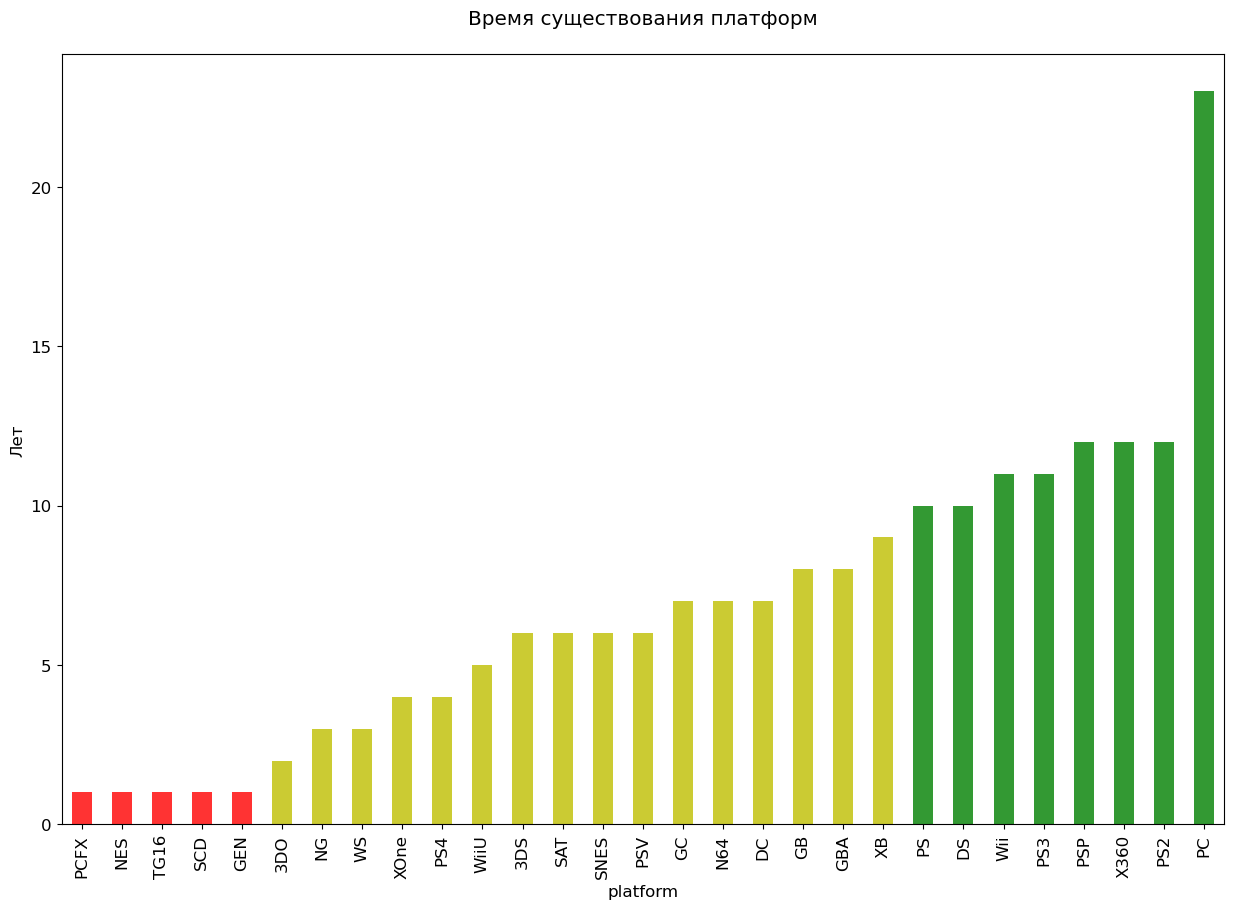

In [49]:
myc = list('rrrrryyyyyyyyyyyyyyyygggggggg')
(
    platforms_life_time
    .replace(0,np.nan)
    .count()
    .sort_values(ascending=True)
    .plot(kind='bar', figsize=(15,10), alpha=0.8, color=myc)
)
plt.title('Время существования платформ\n')
plt.ylabel('Лет')
plt.show()

In [50]:
(
    platforms_life_time
    .replace(0, np.nan)
    .count()
    .describe()[['50%','mean']]
)

50%     6.000000
mean    6.793103
dtype: float64

Если же взять все данные с 1994 года, то продолжительность существования платформ становится меньше. Медианное значение лежит соответствует `6 годам`. Среднее, благодаря `PC`, который до сих пор остается актуальным, соответствует `6.79 годам`. 

Таким образом можно сделать вывод, что популярные консоли в силу тех или иных обстоятельств (например доступность или актуальность) существуют дольше, чем в среднем существуют другие платформы. 

#### <a id='toc1_3_1_2_'></a>Оценка актуальных платформ [](#toc0_)

Так как время жизни платформ составляет в среднем 6 лет, стоит взять половину от этого временного периода - `3 (неполных) года`. В этом случае будет видно, какие платформы развиваются, а какие наоборот. 

In [51]:
# Было
#data_actual_2012 = data.query('year_of_release > 2011')
# Стало
data_actual_2014 = data.query('year_of_release > 2013')

In [52]:
actual_platforms = (
    data_actual_2014
    .pivot_table(index='platform',
                 values='summary_sales',
                 columns='year_of_release',
                 aggfunc='sum',
                 fill_value=0)
)

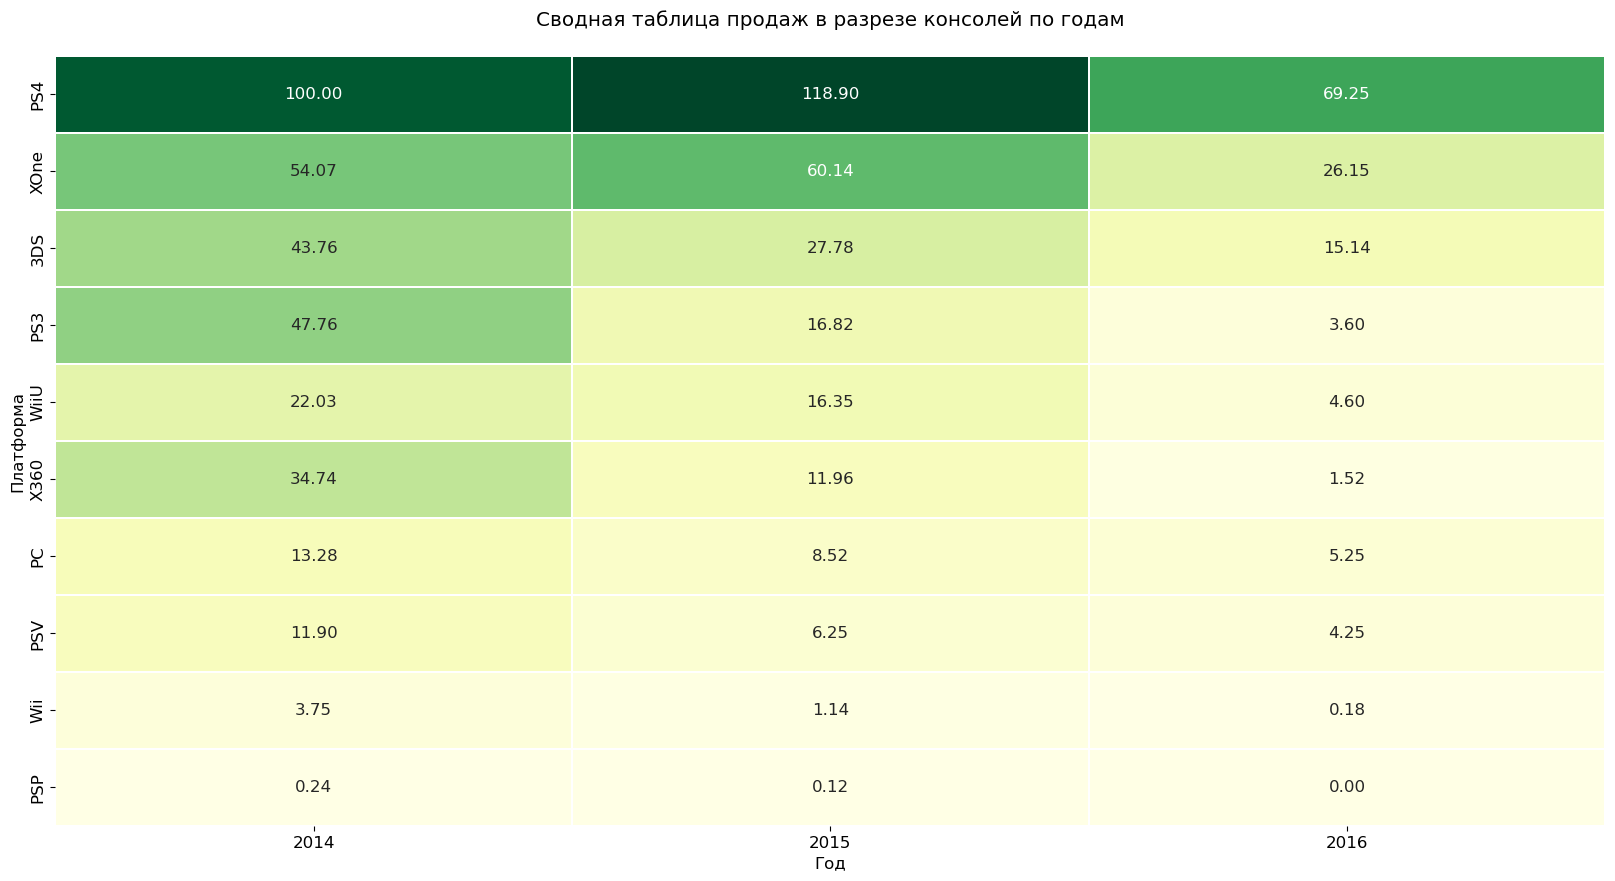

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(actual_platforms.loc[actual_platforms[2015] != 0]\
            .sort_values(by=2015, ascending=False),
              annot=True, fmt=".2f", cmap='YlGn',
                cbar=False, robust=True, linewidths=.2)
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.title('Сводная таблица продаж в разрезе консолей по годам\n')
plt.show()

Из сводной таблицы (сортировка по 2015 году) можно сделать следующие выводы:
- Лидером является `PS4`. При этом лидерство сохранилось и в 2016 год;
- На втором месте находится `XOne`, которая так же является лидером по продажам. Однако эта консоль собрала выручки в ~ 2 раза меньше;
- На четвертом и пятом месте расположились `PS3` и `WiiU`. Если в 2015 году `PS3` обгоняло по продажам `WiiU`, то в 2016 году это вероятно изменится. Связано это с выходом новой приставки - `PS4`. 
- Сборы в категории `PС` заметно просели по сравнению с 2014 годом. Это, вероятно, связано с общей стагнацией рынка.

<Figure size 2000x1000 with 0 Axes>

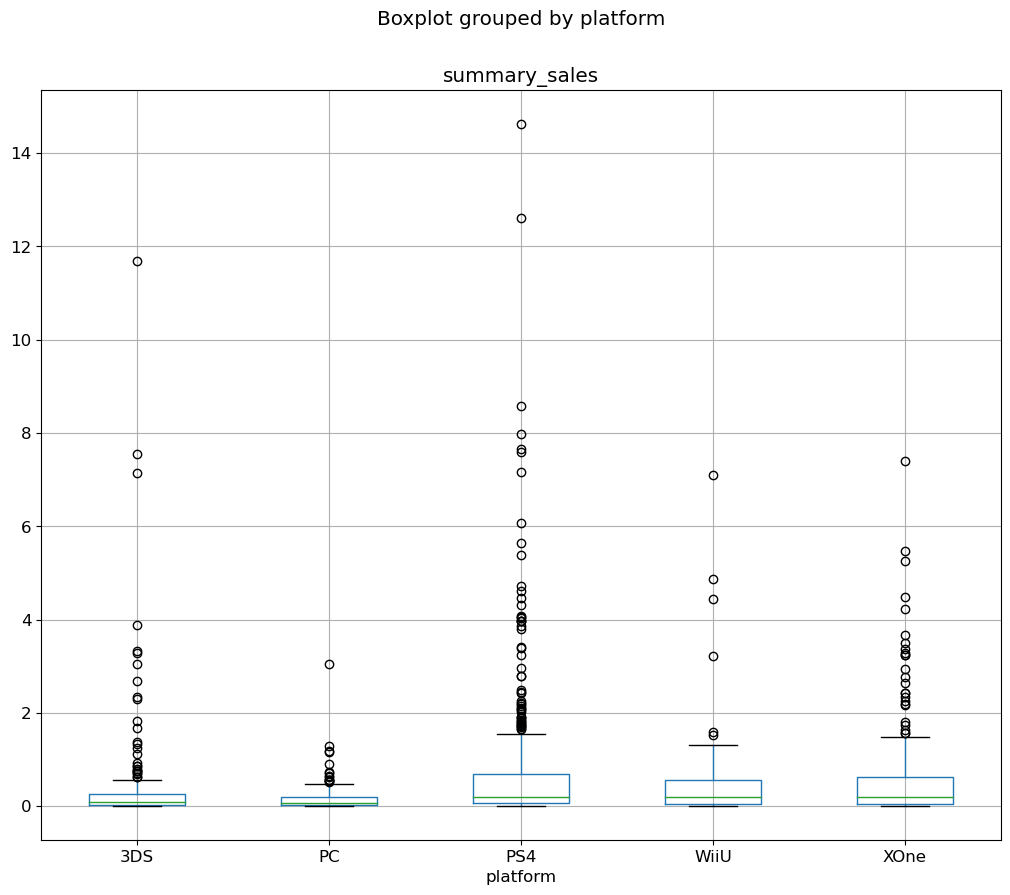

In [54]:
plt.figure(figsize=(20, 10))
actual_platforms_lst = ["PS4", "WiiU", "XOne", "PC", "3DS"]
data_actual_2014.query('platform in @actual_platforms_lst').boxplot(column='summary_sales', by='platform',figsize=(12,10))
plt.show()

In [55]:
(
    data_actual_2014
    .query('platform in @actual_platforms_lst')
    .pivot_table(index='platform',
                 values='summary_sales',
                 aggfunc=['describe','sum'])
                 .droplevel(level=0, axis=1)
)

,25%,50%,75%,count,max,mean,min,std,summary_sales
platform,,,,,,,,,
3DS,0.0300,0.090,0.2500,212.0,11.68,0.408868,0.01,1.188368,86.68
PC,0.0200,0.060,0.2000,151.0,3.05,0.179139,0.01,0.329359,27.05
PS4,0.0575,0.185,0.6900,376.0,14.63,0.766356,0.01,1.614969,288.15
WiiU,0.0500,0.190,0.5700,73.0,7.09,0.588767,0.01,1.161467,42.98
XOne,0.0500,0.205,0.6325,228.0,7.39,0.615614,0.01,1.046513,140.36


`PS4` имеет наибольшее количество выпущенных продуктов - `376` На втором месте идёт `XOne` с `228` продуктами, с небольшим отрывом от третьего месте - `3DS`. При этом по общим продажам `PS4` является бесспорным лидером, в то время как `XOne` здесь имеет больший отрыв от `3DS` - `140.36` против `86.68`. 

Наибольшее количество выбросов (игровых продуктов, которые продавались намного больше других) у `3DS` и `PS4`. Взглянем на эти выбросы. 

In [56]:
data_actual_2014.query('(platform == "3DS" | platform == "PS4") & summary_sales > 12')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
24,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undef,14.63
35,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


- На первом месте `Call of Duty: Black Ops 3`. Благодаря высоким `na_sales` и `eu_sales` данный продукт стал наиболее продаваемым. При этом между этими двумя регионами продажи были практически равномерными;
- На втором месте `Pokemon X/Pokemon Y`. Стоит отметить, что это стало возможным благодаря высоким `jp_sales`;
- На третьем месте `Grand Theft Auto V`. Игра, которая заняла свое место благодаря высоким продажам в Европе. Стоит отметить интересный факт. В начале исследования мы анализировали `GTA: San Andres`. Тогда наибольшие были `na_sales`.


#### <a id='toc1_3_1_3_'></a>Связь между продажами продукта и его оценками [](#toc0_)

Для этих целей возьмем самую популярную консоль - `PS4`:

In [57]:
data_actual_PS4 = data_actual_2014.query('platform == "PS4"')

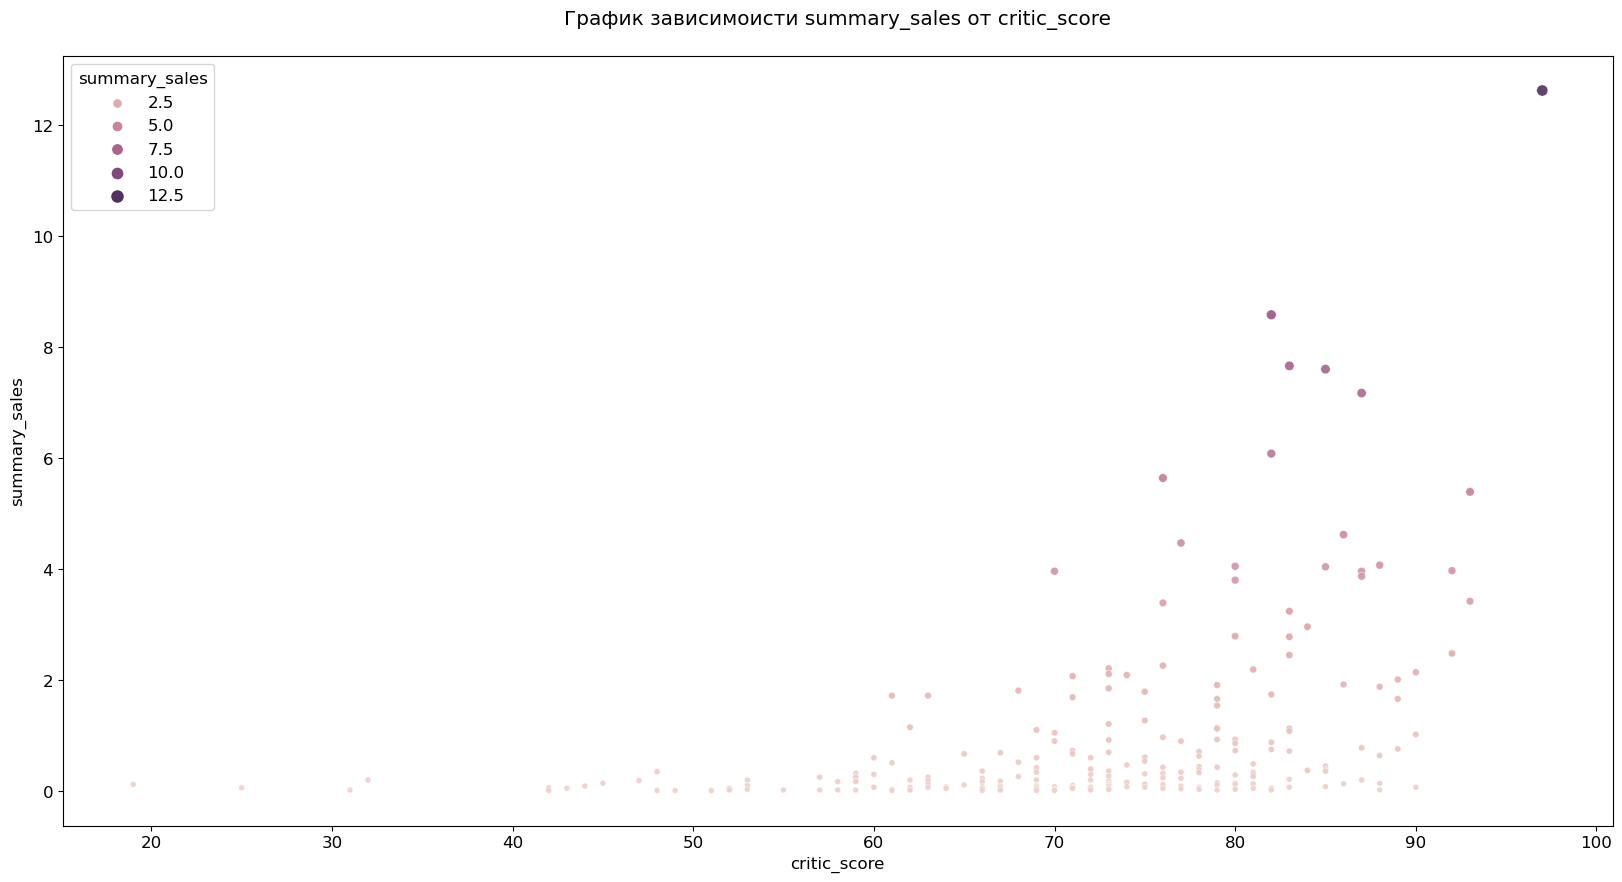

In [58]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_actual_PS4,
                 x='critic_score',
                 y='summary_sales',
                 hue='summary_sales',
                 size="summary_sales",
                 alpha=0.9)
plt.title('График зависимоисти summary_sales от critic_score\n')
plt.show()

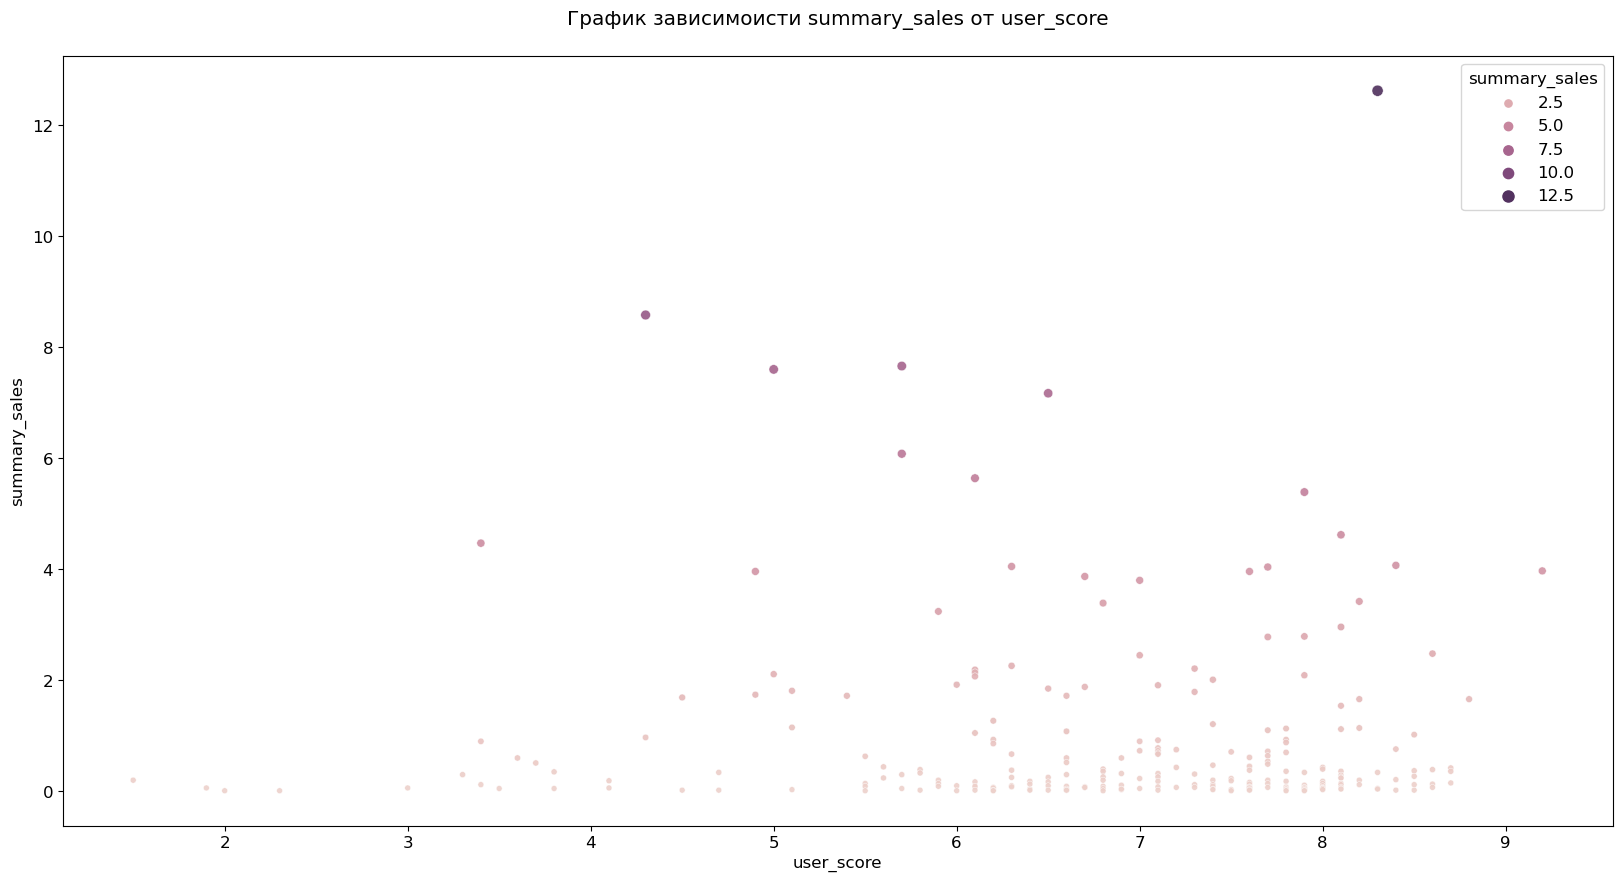

In [59]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_actual_PS4, x='user_score', y='summary_sales', hue='summary_sales',  size="summary_sales", alpha=0.9)
plt.title('График зависимоисти summary_sales от user_score\n')
plt.show()

Рассчитаем корреляцию:

<AxesSubplot:>

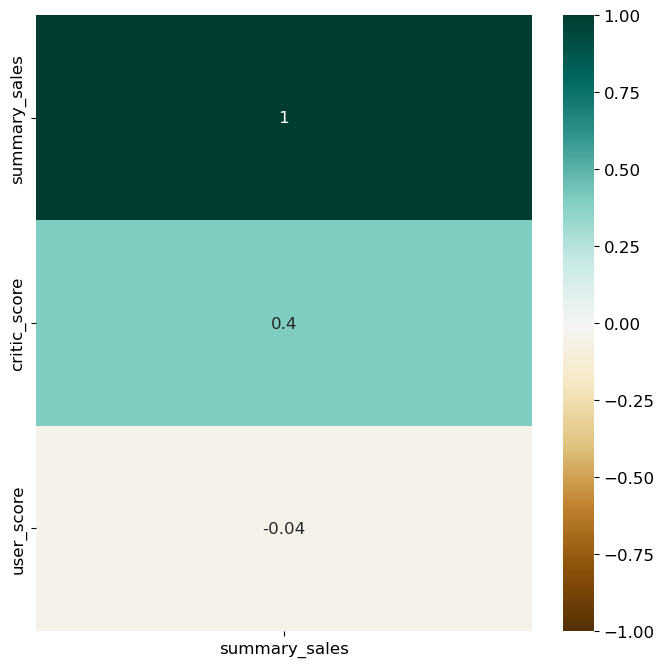

In [60]:
plt.figure(figsize=(8, 8))
sns.heatmap(data_actual_PS4[['user_score','critic_score','summary_sales']].corr()[['summary_sales']]
                .sort_values(by='summary_sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Из представленных данных можно сделать следующий *вывод*:

- `summary_sales` больше зависит от оценки критиков. Однако корреляция весьма слабая - `0.41`. При этом корреляция оценки пользователей и продаж совсем минимальная и имеет отрицательный характер. Это говорит о том, что при планировании продаж стоит в первую очередь обращать внимание на отзывы критиков. 

Проверим корреляцию на других платформах:

In [61]:
data_actual_corr = data_actual_2014.query('platform in @actual_platforms_lst')

In [62]:
for value in actual_platforms_lst:
    print(value)
    data_now = data_actual_corr.query('platform == @value')
    print('Summary sales & critic score correlation: {:.2}'
          .format(data_now['critic_score']
                  .corr(data_now['summary_sales'])))
    print('Summary sales & user score correlation: {:.2}'
          .format(data_now['user_score']
                  .corr(data_now['summary_sales'])))
    print("." * 60)

PS4
Summary sales & critic score correlation: 0.4
Summary sales & user score correlation: -0.04
............................................................
WiiU
Summary sales & critic score correlation: 0.37
Summary sales & user score correlation: 0.41
............................................................
XOne
Summary sales & critic score correlation: 0.43
Summary sales & user score correlation: -0.07
............................................................
PC
Summary sales & critic score correlation: 0.17
Summary sales & user score correlation: -0.072
............................................................
3DS
Summary sales & critic score correlation: 0.31
Summary sales & user score correlation: 0.22
............................................................


На других платформах картина иная. Здесь выделяется `WiiU`, где корреляция между продажами и оценками пользователей больше, чем у оценок критиков и равна `0.4`. Похожая, но слабая связь у `3DS`. Во всех остальных платформах тенденция прослеживается ясно - слабая зависимость между оценками критиков и продажами, и отрицательная корреляция между продажами и оценками пользователей. 

#### <a id='toc1_3_1_4_'></a>Жанры игр [](#toc0_)

In [63]:
genre_table = (
    data_actual_2014
    .pivot_table(index='genre',
                 values='summary_sales',
                 columns='year_of_release',
                 aggfunc='median',
                 margins=True)[:-1]
    )

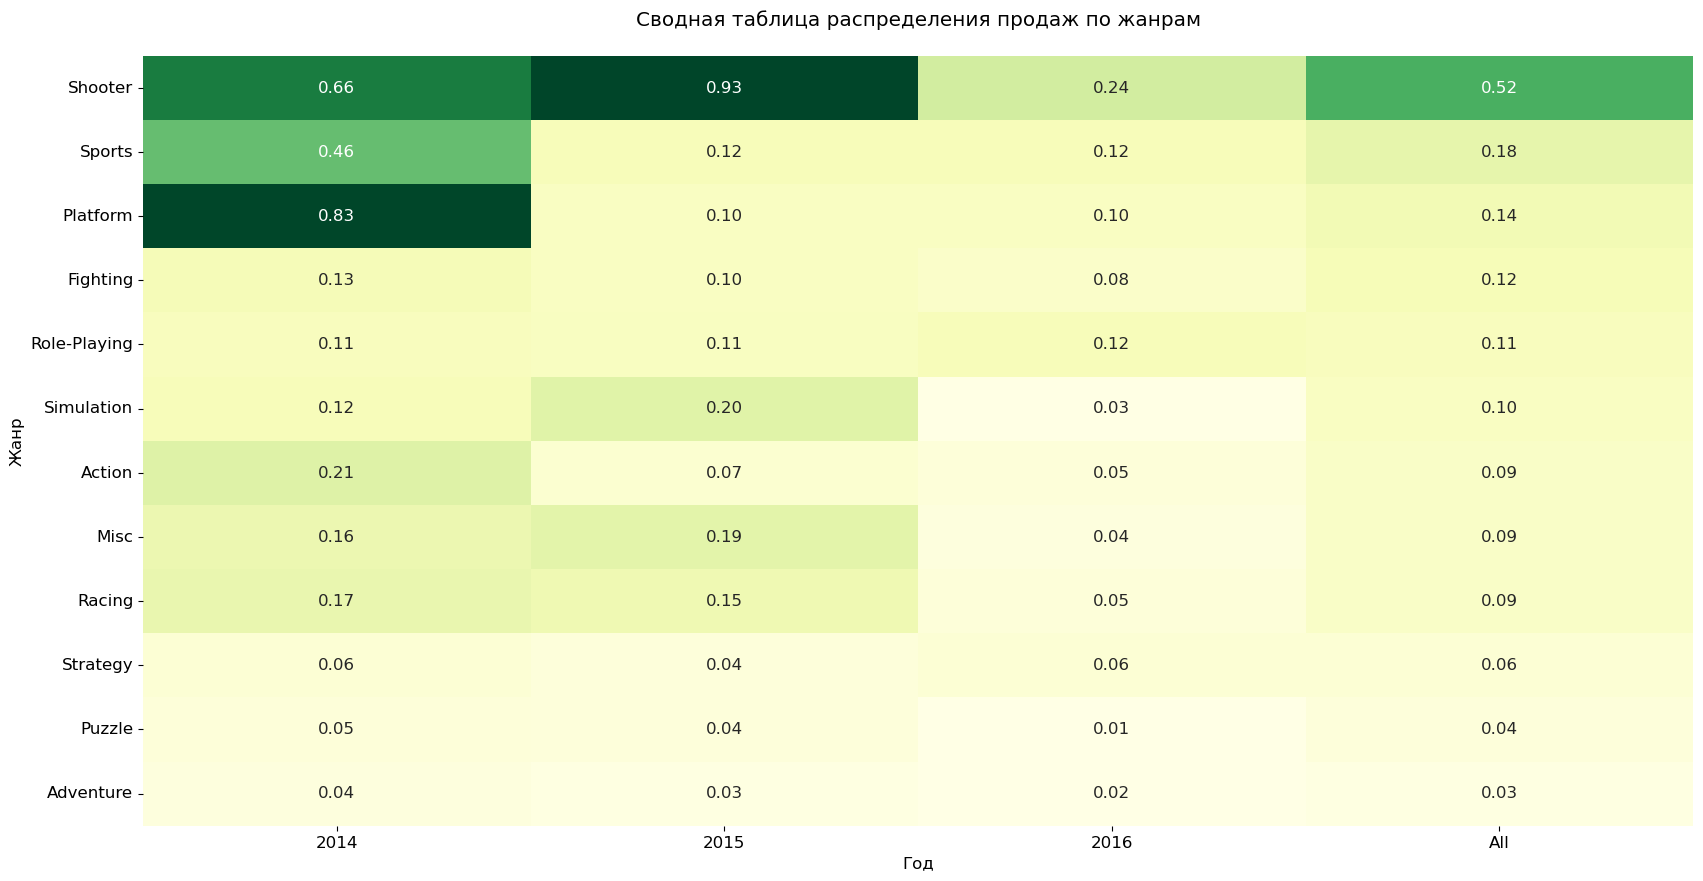

In [64]:
plt.figure(figsize=(20, 10))
sns.heatmap(genre_table.sort_values(by='All',ascending=False),\
             annot=True, fmt=".2f", cmap='YlGn', cbar=False, robust=True)
plt.xlabel('Год')
plt.ylabel('Жанр')
plt.title('Сводная таблица распределения продаж по жанрам\n')
plt.show()

Самые популярные жанры: `Shooter`, `Sports`, `Platform`, `Fighting` и `Role-Playing`. При этом в 2016 году, `shooter` также имеет наибольшие медианные продажи. За три года данный жанр оторвался от других по медианным продажам в `~3` раза.  Самый непопулярный жанр - `Adventure`. На втором месте с конца - `Puzzle`. Стоит отметить, что все жанры имеют равномерно распределенную медианную прибыль, кроме выбивающегося первого места. 

In [65]:
genre_table_platforms = (
    data_actual_2014
    .query('platform == @actual_platforms_lst')
    .pivot_table(index='genre',
                 values='summary_sales',
                 columns='platform',
                 aggfunc='median',
                 margins=True).iloc[:,:-1]
)

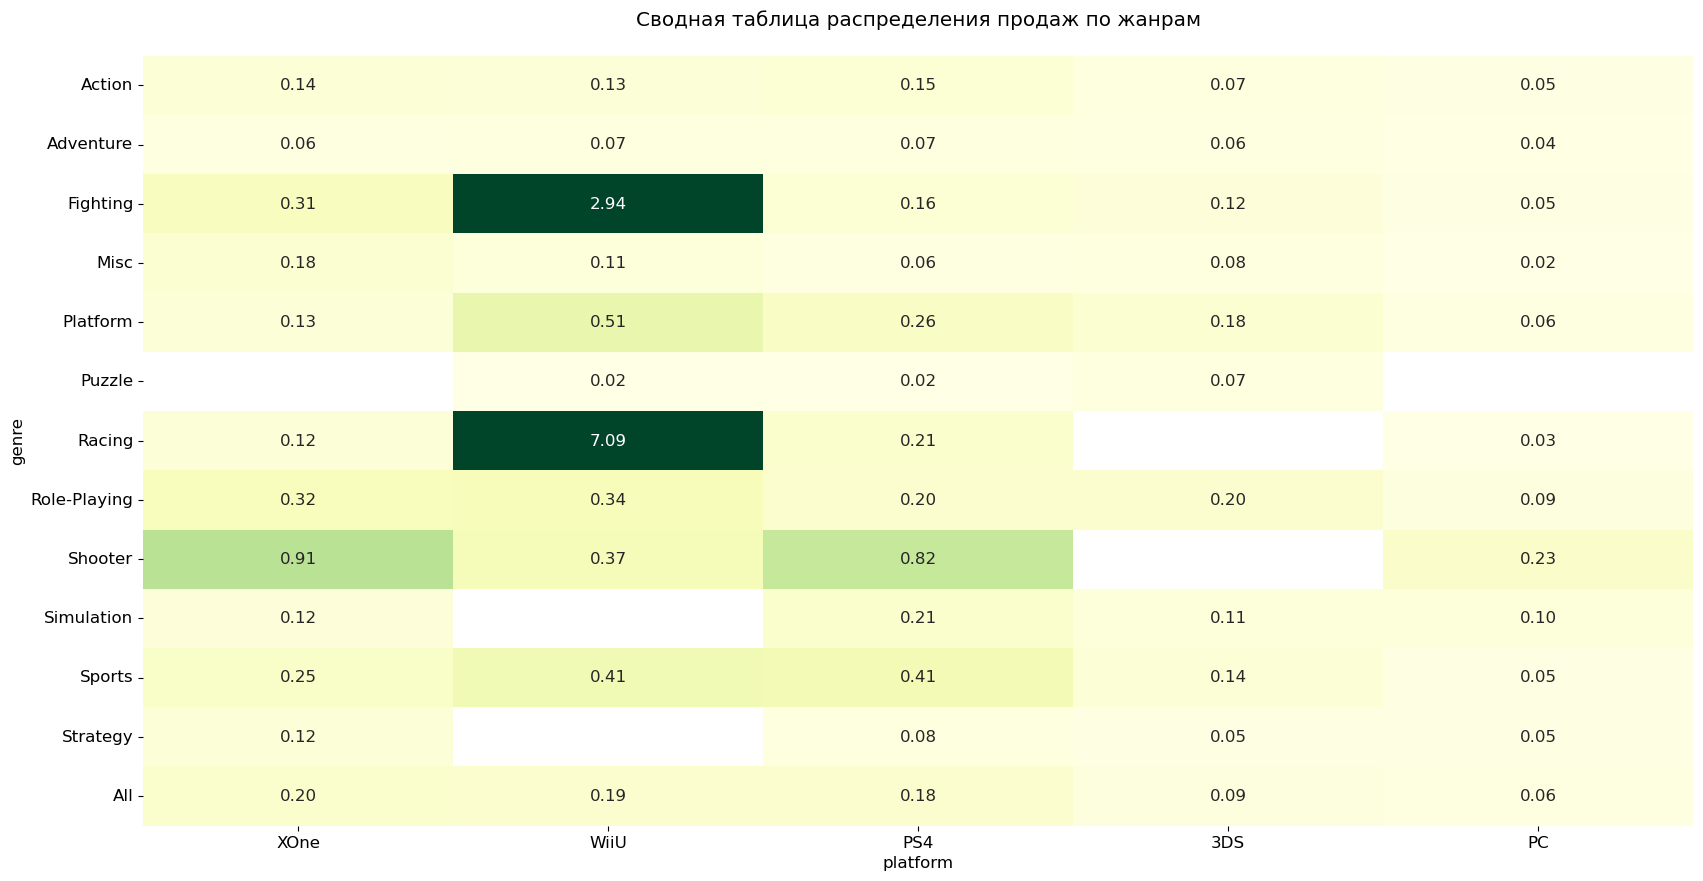

In [66]:
plt.figure(figsize=(20, 10))
sns.heatmap(genre_table_platforms.sort_values(axis=1, by='All', ascending=False),
             annot=True,
               fmt=".2f",
                 cmap='YlGn',
                   cbar=False,
                     robust=True)
plt.title('Сводная таблица распределения продаж по жанрам\n')
plt.show()

Целевая аудитория различается по платформам:
- У лидера продаж `PS4` наиболее популярные жанры - `Sports` и `Shooter`;
- На платформе `3DS` предпочитают в основном `Role-Playing` и `Platform`;
- У пользователей `PC` спрос по жанрам распределен равномерно (не учитывая явного фаворита `Shooter`).

## <a id='toc1_4_'></a>Шаг 4. Портрет пользователя по регионам [](#toc0_)

#### <a id='toc1_4_1_1_'></a>Платформы [](#toc0_)

In [67]:
regional_top_five_platform = (
    data_actual_2014
    .pivot_table(columns='platform',
                 values=['na_sales','eu_sales','jp_sales','other_sales','summary_sales'],
                 aggfunc='sum')
    .sort_values(by='summary_sales',axis=1, ascending=False)
    .iloc[:-1,0:5]
)

In [68]:
regional_top_five_platform

platform,PS4,XOne,3DS,PS3,X360
eu_sales,130.04,46.25,16.12,25.54,15.49
jp_sales,15.02,0.32,44.24,11.22,0.08
na_sales,98.61,81.27,22.64,22.05,28.30
other_sales,44.48,12.52,3.68,9.37,4.35


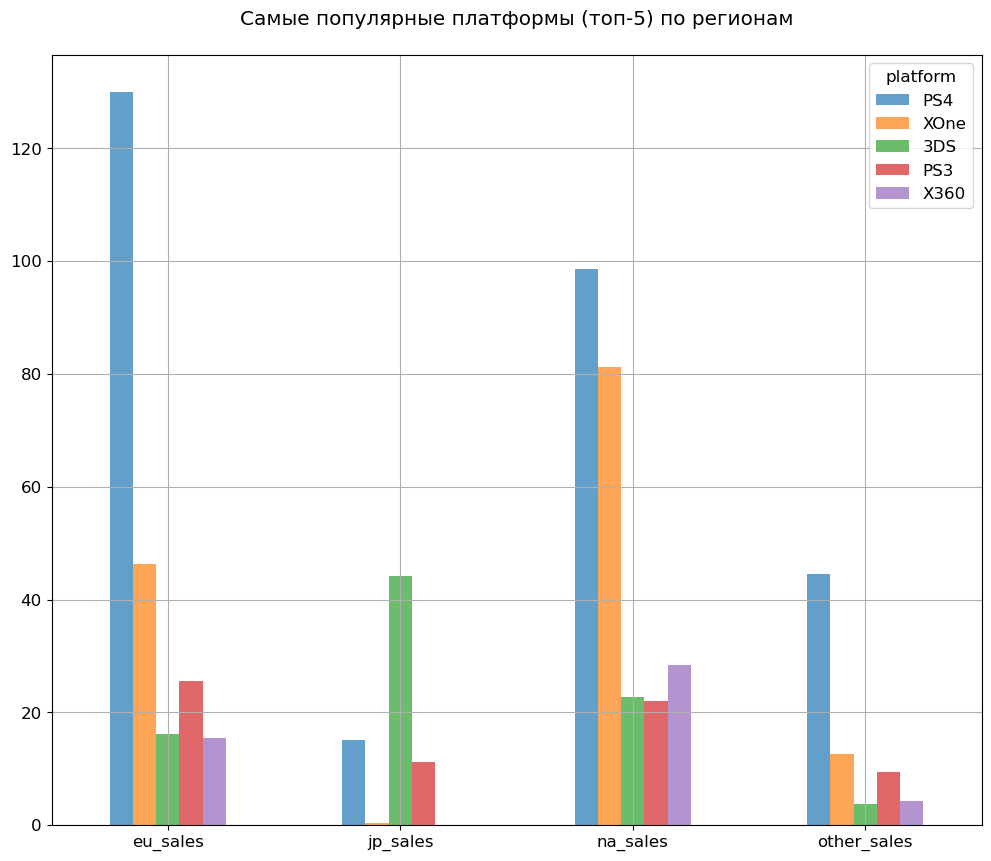

In [69]:
regional_top_five_platform.plot(kind='bar', alpha=0.7, figsize=(12,10), grid=True, rot=0)
plt.title('Самые популярные платформы (топ-5) по регионам\n')
plt.show()

В европ

В Европе и Северной Америке больше предпочитают `PS4`, чем `X360`, которая занимает второе место в обоих регионах. В Японии же обычно отдают предпочтение платформе `3DS`, затем идут консоли линейки `PS`. В данном регионе `XOne` совсем не популярная платформа.

#### <a id='toc1_4_1_2_'></a>Жанры [](#toc0_)

In [70]:
regional_top_five_genre = (
    data_actual_2014
    .pivot_table(columns='genre',
                 values=['na_sales','eu_sales','jp_sales','other_sales','summary_sales'],
                 aggfunc='sum')
    .sort_values(by='summary_sales',axis=1, ascending=False)
    .iloc[:-1,0:5]
)

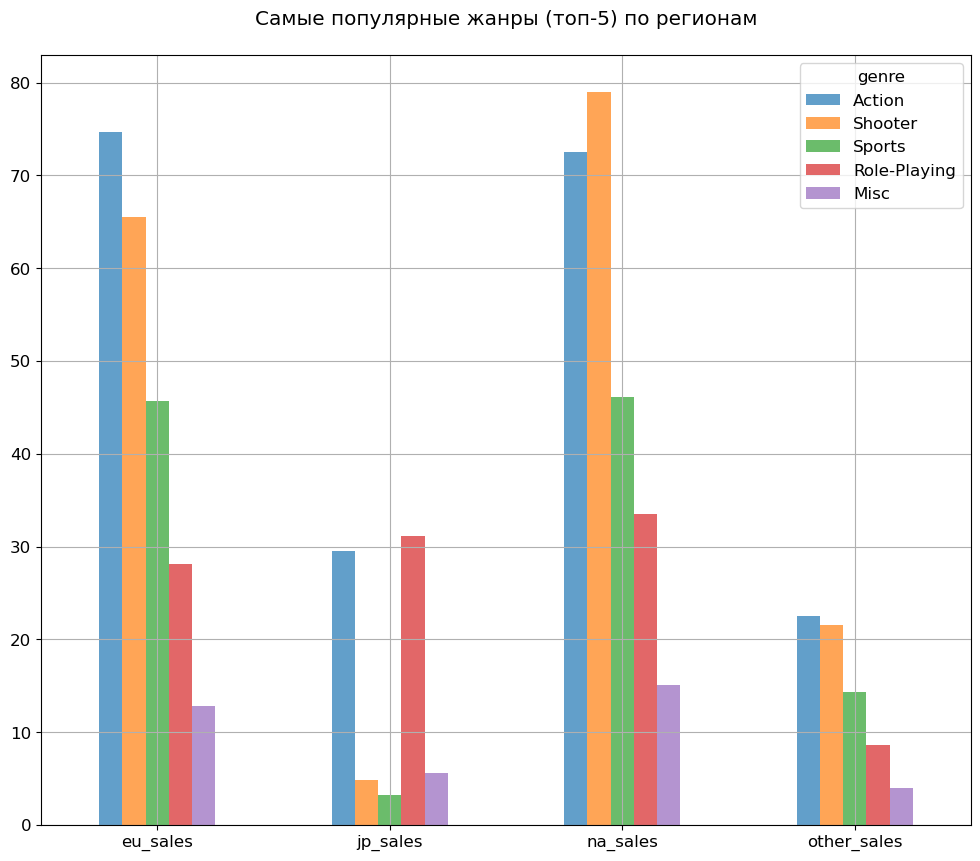

In [71]:
regional_top_five_genre.head(5).plot(kind='bar', alpha=0.7, figsize=(12,10), grid=True,rot=0)
plt.title('Самые популярные жанры (топ-5) по регионам\n')
plt.show()

Самый популярный жанр в Европе - `Action`, на втором месте идёт `Shooter`. В Северной Америке же всё наоборот, здесь `Shooter` обгоняет `Action`. В Японии же больше отдают предпочтение ролевым играм и, в чуть меньшей степени, `Actions`.

#### <a id='toc1_4_1_3_'></a>ESRB [](#toc0_)

In [72]:
regional_top_five_rating = (
    data_actual_2014
    .pivot_table(columns='rating',
                 values=['na_sales','eu_sales','jp_sales','other_sales','summary_sales'],
                 aggfunc='sum')
    .sort_values(by='summary_sales',axis=1, ascending=False)
    .iloc[:-1]
)

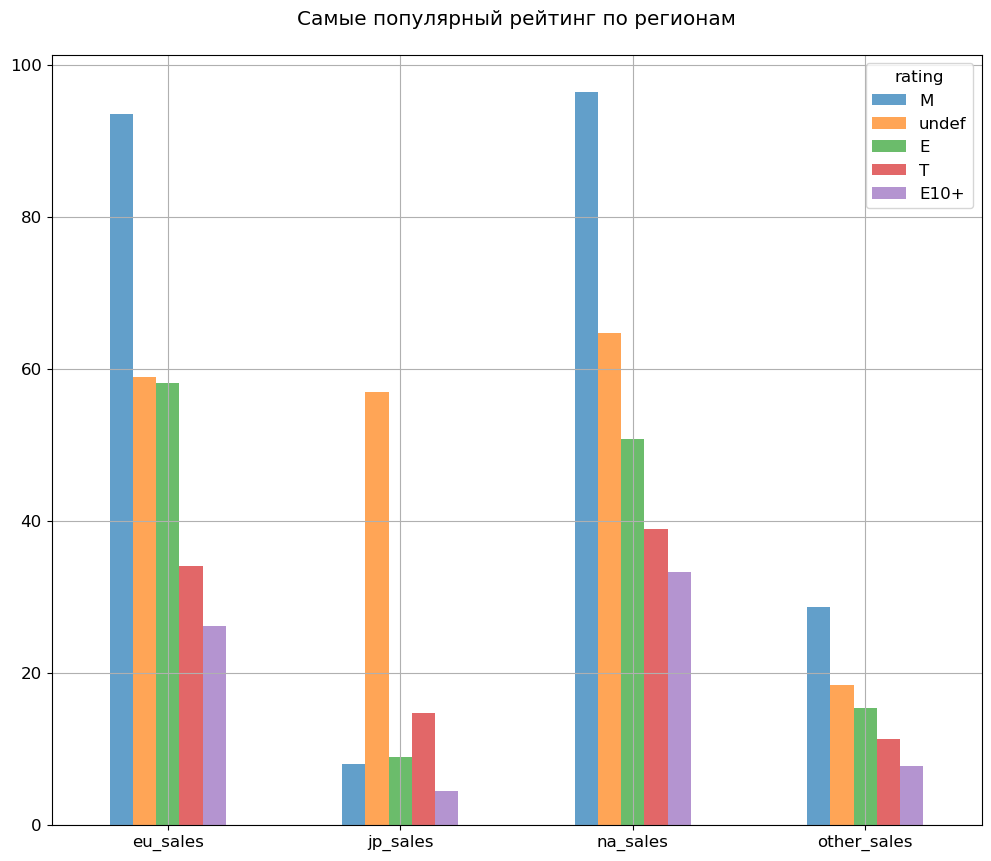

In [73]:
regional_top_five_rating.plot(kind='bar', alpha=0.7, figsize=(12,10), grid=True, rot=0)
plt.title('Самые популярный рейтинг по регионам\n')
plt.show()

 Топ самых продаваемых категорий в Америке и Европе - "для взрослых (старше 16 лет)". На втором месте игры без рейтинга, на третьем игры для всех - категория игр с широкой целевой аудиторией.
 В Японии по популярности выбиваются игры, не имеющие рейтинга. Это может быть связано со спецификой ESRB-рейтинга, который предназначен для рецензирования игр на территории Северной Америки. 

## <a id='toc1_5_'></a>Шаг 5. Проверка гипотез [](#toc0_)

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


H_0: Средний пользовательский рейтинг (user_score) платформ `XOne` =  cредний пользовательский рейтинг (user_score) платформ `PC`

H_1: Средний пользовательский рейтинг (user_score) платформ `XOne` ≠  cредний пользовательский рейтинг (user_score) платформ `PC`

Для проверки гипотезы будем использовать критерий Стьюдента, так как совокупности достаточно велики, равным между собой и независимы. 

Значение критического уровня вероятности (альфа) - 5%. 

In [74]:
alpha = .05
results = st.ttest_ind(
    data_actual_2014.query('platform=="XOne" & user_score.notna()')['user_score'],
    data_actual_2014.query('platform=="PC" & user_score.notna()')['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


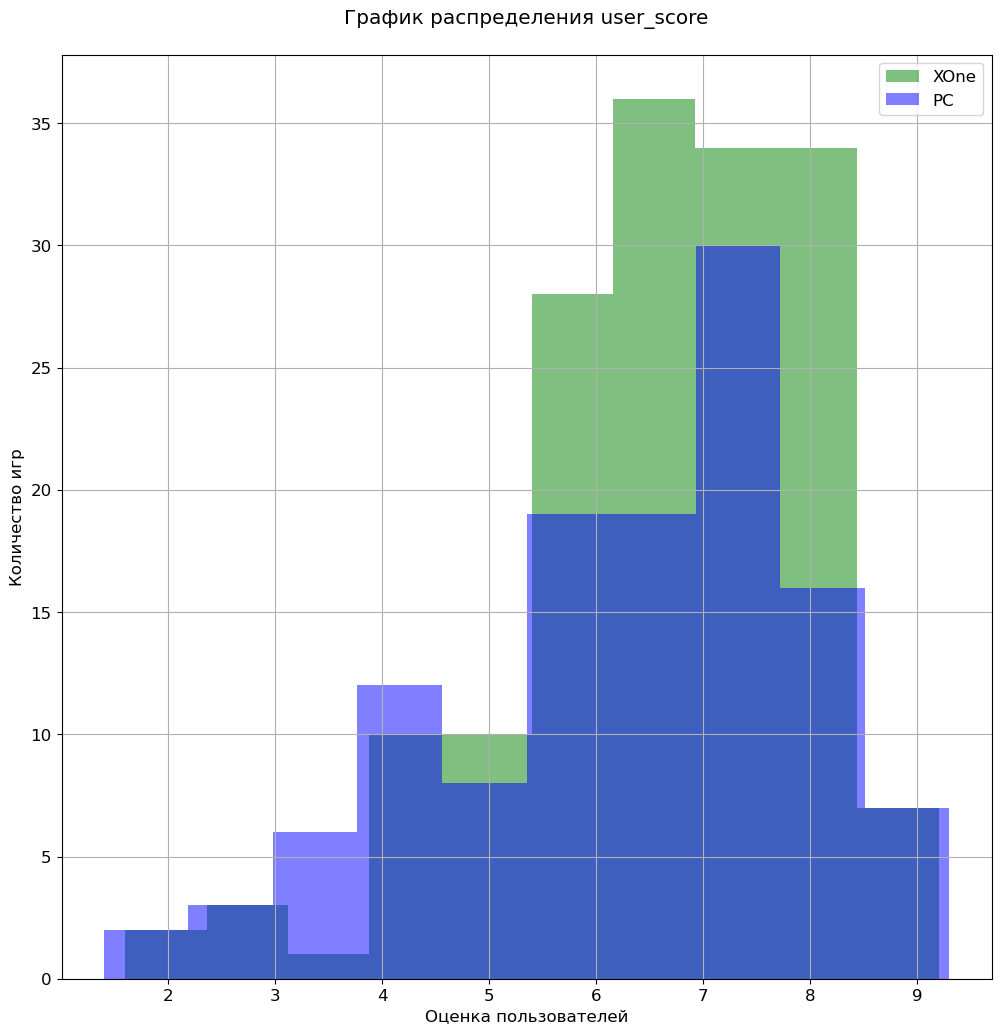

In [75]:
data_actual_2014[data_actual_2014['platform'] =='XOne']['user_score'].hist(bins=10, alpha=0.5, color='green')
data_actual_2014[data_actual_2014['platform'] =='PC']['user_score'].hist(bins=10, alpha=0.5, color='blue')
plt.legend(['XOne', 'PC'])
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество игр')
plt.title('График распределения user_score\n')
plt.show()

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: средние пользовательский рейтинг Action = Sports;

H_1 = средние пользовательский рейтинг Action ≠ Sports;

Для проверки гипотезы будем использовать критерий Стьюдента, так как совокупности достаточно велики, равным между собой и независимы. 

Значение критического уровня вероятности (альфа) - 5%.

In [76]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    data_actual_2014.query('genre=="Action" & user_score.notna()')['user_score'],
    data_actual_2014.query('genre=="Sports" & user_score.notna()')['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


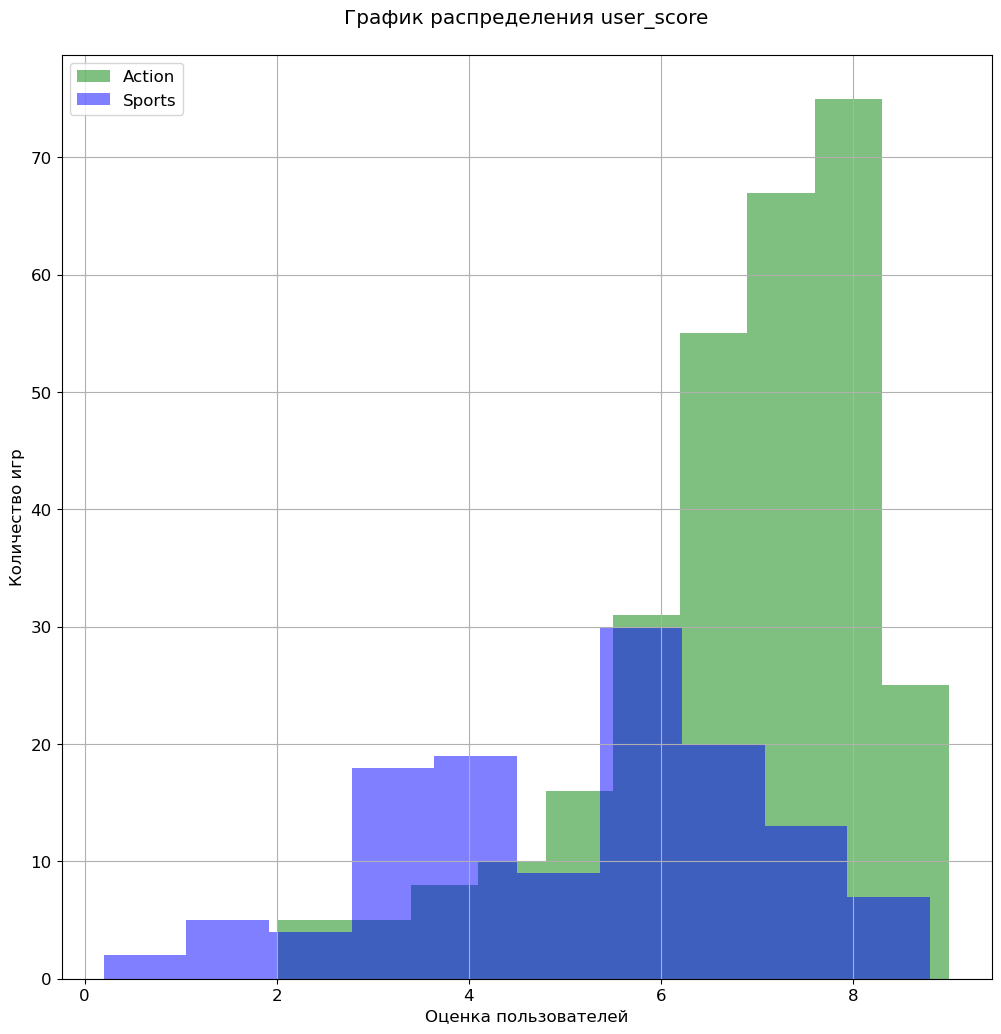

In [77]:
data_actual_2014[data_actual_2014['genre'] =='Action']['user_score'].hist(bins=10, alpha=0.5, color='green')
data_actual_2014[data_actual_2014['genre'] =='Sports']['user_score'].hist(bins=10, alpha=0.5, color='blue')
plt.legend(['Action', 'Sports'])
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество игр')
plt.title('График распределения user_score\n')
plt.show()

## <a id='toc1_6_'></a>Вывод [](#toc0_)

В исследовании был проведен анализ архива рынка видеоигр за период с 1980 г. - по 2016 г.

a. Исходные данные:

Исход данные представляли собой датасет с размером: 16436 строки и 12 колонки. В них содержалось пропуски и выбросы. 

b. Переработка данных:

Каждый параметр была проанализировано как изолированно друг от друга, так и в совокупности с другими параметрами, которые могут влияет на анализируемый параметр. Была проделана следующая работа:

* Отформатировали колонку с датой, поменяли формат на datetime;
* Колонки приведены к нижнему регистру;
* Обработали дубликаты и пропуски.

Результат: Данные были обработаны от пропусков и аномальных значений. Сохранность выборки составила - 98.33%.

c. Была добавлена следующая информация:
* добавили отдельно колонку с общим количеством продаж по всем регионам;

d. Был проведен общий анализ рынка видеоигр. Он показал, что:

* Количество выпускаемых игр динамический показатель, чувствительный к конъюнктуре рынка. Так, имеющиеся данные можно разделить на четыре периода:
  - С 1980 по ~ 1991 год. В этом периоде имеется своя микро динамика, однако по сравнению с последующими годами данный отрезок не представляет никакого интереса;
  - C 1991 по ~ 2000 год. Количество выпускаемых игр растёт. Значения находится на уровне 60-70% от периода 2012 - 2016 года. Недостаток - малое количество оценок критиков и пользователей.
  - c 2000 по 2009 год. Расцвет рынка видеоигр. От года к году количество выпускаемых игр растёт, большое количество оценок;
  - с 20010 по 2016 год. Стагнация рынка видеоигр. Общие тенденции остаются - количество оценок критиков и пользователей составляет ~50%. 
* Наиболее популярная платформа: `PS2` на первом месте с - `18%` долей рынка. 
* В среднем консоли существуют около ~ `7 лет`. Наиболее популярные консоли в среднем оставались актуальными около `11 лет`;
* Наиболее популярные консоли на 2015-2016 год в порядке убывания популярности - `PS4`, `XOne`, `3DS`,`PS3`,`WiiU`,`PC`; 
* Корреляция между `user_score`/`critic_score` и `summary_sales` зависит от платформы. Общие тенденции: `critic_score` более скоррелирован с `summary_sales`, чем `user_score`, однако показатель корреляции составляет до ~ `0.4` - это свидетельствует о достаточно слабой связи. Исключением является платформа `WiiU`, у которой оценки пользователей больше скоррелированы с продажами, чем оценки критиков;
* Наиболее продаваемые жанры: `Shooter`, `Sports`, `Platform`, `Fighting` и `Role-Playing`. В разрезе по консолям пользователи имеют свои предпочтения по жанрам. Например, у `PS4` наиболее популярные жанры - `Sports` и `Shooter`, в то время как на платформе `3DS` предпочитают `Role-Playing`;
* В Европе и Северной Америке больше предпочитают `PS4`, чем `X360`, которая занимает второе место в обоих регионах. В Японии же обычно отдают предпочтение платформе `3DS`, затем идут консоли линейки `PS`. В данном регионе `XOne` совсем не популярная платформа;
* Самый популярный жанр в Европе - `Action`, на втором месте идёт `Shooter`. В Северной Америке же всё наоборот, здесь `Shooter` обгоняет `Action`. В Японии же больше отдают предпочтение ролевым играм и, в чуть меньшей степени, `Actions`.
*  Топ самых продаваемых категорий в Америке и Европе - "для взрослых (старше 16 лет)". На втором месте игры без рейтинга, на третьем игры для всех - категория игр с широкой целевой аудиторией.
 В Японии по популярности выбиваются игры, не имеющие рейтинга. Это может быть связано со спецификой ESRB-рейтинга, который предназначен для рецензирования игр на территории Северной Америки. 